In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
import warnings

warnings.filterwarnings('ignore')

# Combine 76 and 83 relationships

## 76 relationships: 27 participants

In [4]:
# Prep responses and key
raw = pd.read_csv('../../input_data/qualtrics_data/'+
                  'RK - Literature Dimensions - fMRI relationships_June 7, 2021_09.42.csv')
raw_reorg = raw.drop(axis='index',index=[0,1])
raw_reorg = raw_reorg.reset_index(drop=True)
raw_reorg['Duration (in seconds)'] = pd.to_numeric(raw_reorg['Duration (in seconds)'])
key = pd.read_csv('../../input_data/qualtrics_data/qualtrics_question_key.csv')
dimensions = key['dimension'].tolist()[2:-3]
######

# filter the 27 participants who have finished 76 relationships_76r survey.
raw_reorg_id = raw_reorg
raw_reorg_id['MTurkCode'] = raw_reorg['MTurkCode']
raw_reorg_id['MTurkCode'] = pd.to_numeric(raw_reorg_id['MTurkCode'])

participants_id = pd.read_csv('../../input_data/meadows_data/participants.csv')
within_27p = [int(i) for i in participants_id['MTurkCode'].dropna()]
raw_reorg_27p = raw_reorg_id[raw_reorg_id['MTurkCode'].isin(within_27p)]

# assign id to index for combining data later 
for MTurk_id in within_27p:
    raw_reorg_27p.loc[raw_reorg_27p['MTurkCode']==MTurk_id,
                      'id']=participants_id.loc[participants_id['MTurkCode']==MTurk_id,'id'].values[0]
raw_reorg_27p.index = raw_reorg_27p['id']
responses = raw_reorg_27p
responses = responses.loc[:, responses.columns.str.startswith('Q')]

# Get total number of responses
print("Total number of responses from qualtrics - "+str(len(responses)))
######

filter_col = [col for col in raw if col.startswith('Q8.2')]
relationships_76r = raw[filter_col].iloc[0]
relationships_76r = [s.replace('\xe2\x80\x93', '-') for s in relationships_76r]
relationships_76r = [i.split(' - ', 1)[1] for i in relationships_76r]
dimension_frames_76r = {}
count=2
for dim in dimensions:  # exclude foil and demographics
    filtered_cols = [col for col in raw_reorg if col.startswith('Q'+str(key['block'].iloc[count])+'.2')]
    dimension_frames_76r[dim] = pd.DataFrame(responses[filtered_cols])
    dimension_frames_76r[dim] = dimension_frames_76r[dim].apply(pd.to_numeric)
    dimension_frames_76r[dim].columns = relationships_76r
    count=count+1

print("Total number of relationships_76r - " + str(len(dimension_frames_76r[dim].columns)))
print("Total number of dimensions - " + str(len(dimensions)))

Total number of responses from qualtrics - 27
Total number of relationships_76r - 76
Total number of dimensions - 30


## 83 relationships: 14 participants

In [5]:
# Prep responses and key
raw = pd.read_csv('../../input_data/qualtrics_data/Literature Dimensions - 83 Relationships_September 21, 2022_09.24.csv',
                  encoding = 'gb18030')
raw_reorg = raw.drop(axis='index',index=[0,1])
raw_reorg = raw_reorg[raw_reorg['Finished']=='1']
raw_reorg = raw_reorg.reset_index(drop=True)
raw_reorg['Duration (in seconds)'] = pd.to_numeric(raw_reorg['Duration (in seconds)'])
key = pd.read_csv('../../input_data/qualtrics_data/qualtrics_question_key.csv')
dimensions = key['dimension'].tolist()[2:-3]
######

# filter the 14 participants who have finished 83 relationships_83r survey.
raw_reorg_id = raw_reorg
raw_reorg_id['MTurkCode'] = raw_reorg['random ID']
raw_reorg_id['MTurkCode'] = pd.to_numeric(raw_reorg_id['MTurkCode'])
participants_id = pd.read_excel('../../input_data/qualtrics_data/qualtrics_survey_tracking.xlsx')
participants_id['qualtrics_code'] = pd.to_numeric(participants_id['qualtrics_code'])
within_14p = [int(i) for i in participants_id['qualtrics_code'].dropna()]
raw_reorg_14p = raw_reorg_id[raw_reorg_id['MTurkCode'].isin(within_14p)]

# assign id to index for combining data later 
for MTurk_id in within_14p:
    raw_reorg_14p.loc[raw_reorg_14p['MTurkCode']==MTurk_id,
                      'id']=participants_id.loc[participants_id['qualtrics_code']==MTurk_id,'subject_id'].values[0]
sub_id_list = raw_reorg_14p['id'].to_list()

raw_reorg_14p.index = raw_reorg_14p['id']
responses = raw_reorg_14p
#responses = responses[~responses.index.isna()]
responses = responses.loc[:, responses.columns.str.startswith('Q')]

# Get total number of responses
print("Total number of responses from qualtrics - "+str(len(responses)))
######


filter_col = [col for col in raw if col.startswith('Q8.2')]
relationships_83r = raw[filter_col].iloc[0]
relationships_83r = [s.replace('\xe2\x80\x93', '-') for s in relationships_83r]
relationships_83r = [i.split(' - ', 1)[1] for i in relationships_83r]
dimension_frames_83r = {}
count=2
for dim in dimensions:  # exclude foil and demographics
    filtered_cols = [col for col in raw_reorg if col.startswith('Q'+str(key['block'].iloc[count])+'.2')]
    dimension_frames_83r[dim] = pd.DataFrame(responses[filtered_cols])
    dimension_frames_83r[dim] = dimension_frames_83r[dim].apply(pd.to_numeric)
    dimension_frames_83r[dim].columns = relationships_83r
    count=count+1

    
print("Total number of relationships_83r - " + str(len(dimension_frames_83r[dim].columns)))
print("Total number of dimensions - " + str(len(dimensions)))

Total number of responses from qualtrics - 14
Total number of relationships_83r - 83
Total number of dimensions - 30


## combine all relationships

In [6]:
def fix_labels(rels):
    # new data
    rels = [s.replace(' 鈥?', ' - ') for s in rels]    
    rels = [s.replace('鈥檚', '') for s in rels] 
    # Make conditions list and the columns/rows of the distance matrix lowercase
    rels = [x.lower() for x in rels]

    rels = [x.replace('–','and') for x in rels]
    rels = [x.replace(' - ',' and ') for x in rels]
    rels = [x.replace('  ',' ') for x in rels]
    rels = [x.replace('between ','') for x in rels]
    
    rels = [x.replace('-',' ') for x in rels]
    
    rels = [x.replace('monarch and minister', 'a monarch and their minister') for x in rels]
    rels = [x.replace('person and crush', 'a person and their crush') for x in rels]
    rels = [x.replace('person and deceased spouse', 'a person and their deceased spouse') for x in rels]
    rels = [x.replace('person and family friends', 'a person and their family friends') for x in rels]
    rels = [x.replace('uncle and neice/nephew', 'uncle and niece/nephew') for x in rels]
    rels = [x.replace('man’s wife and man’s mistress', 'man wife and man mistress') for x in rels]
    
    rels = [x.replace('man’s wife and man’s mistress', 'man wife and man mistress') for x in rels]
     
    return rels

In [7]:
# get index of participants in 83 relationships survey
dim = dimensions[0]
within_14p = list(dimension_frames_83r[dim].index)
relationships = relationships_76r + relationships_83r
relationships = fix_labels(relationships)

dimension_frames_159r = {}
for dim in dimensions:
    df_76r = dimension_frames_76r[dim].loc[within_14p,:]
    df_83r = dimension_frames_83r[dim]
    df_159r = df_76r.join(df_83r)
    df_159r.columns = relationships
    dimension_frames_159r[dim] = df_159r

# Dimension Relationship Ratings Matrix

In [12]:
def clean_data(dimension_frames,relationships,sub_id):
    count = 0
    dim_rel = pd.DataFrame(columns = relationships)
    
    for dim in dimensions:
        dim_rel.loc[count] = dimension_frames[dim].loc[sub_id,].tolist()
        count = count + 1
    dim_rel.index = dimension_frames.keys()
    sub_id = sub_id.replace('soc','sub')
    dim_rel.to_csv('../../output_data/individual/dimension/clean_results/dim_rel/'+sub_id+'.csv')
       
    dim_rel_scaled = preprocessing.scale(dim_rel.transpose())
    dim_rel_scaled_df = pd.DataFrame(dim_rel_scaled, index=dim_rel.columns,
                                     columns=dim_rel.index)
    dim_rel_scaled_df.to_csv('../../output_data/individual/dimension/clean_results/dim_rel_scaled/'+sub_id+'.csv')
    
    plt.figure(figsize=(30,15))
    plt.title(sub_id)
    dim_rel = dim_rel.apply(pd.to_numeric)
    sns.heatmap(dim_rel,center=50,cmap="RdBu_r")
    
    return sub_id

['sub-700',
 'sub-754',
 'sub-301',
 'sub-767',
 'sub-722',
 'sub-765',
 'sub-716',
 'sub-720',
 'sub-706',
 'sub-766',
 'sub-693',
 'sub-759',
 'sub-701',
 'sub-762']

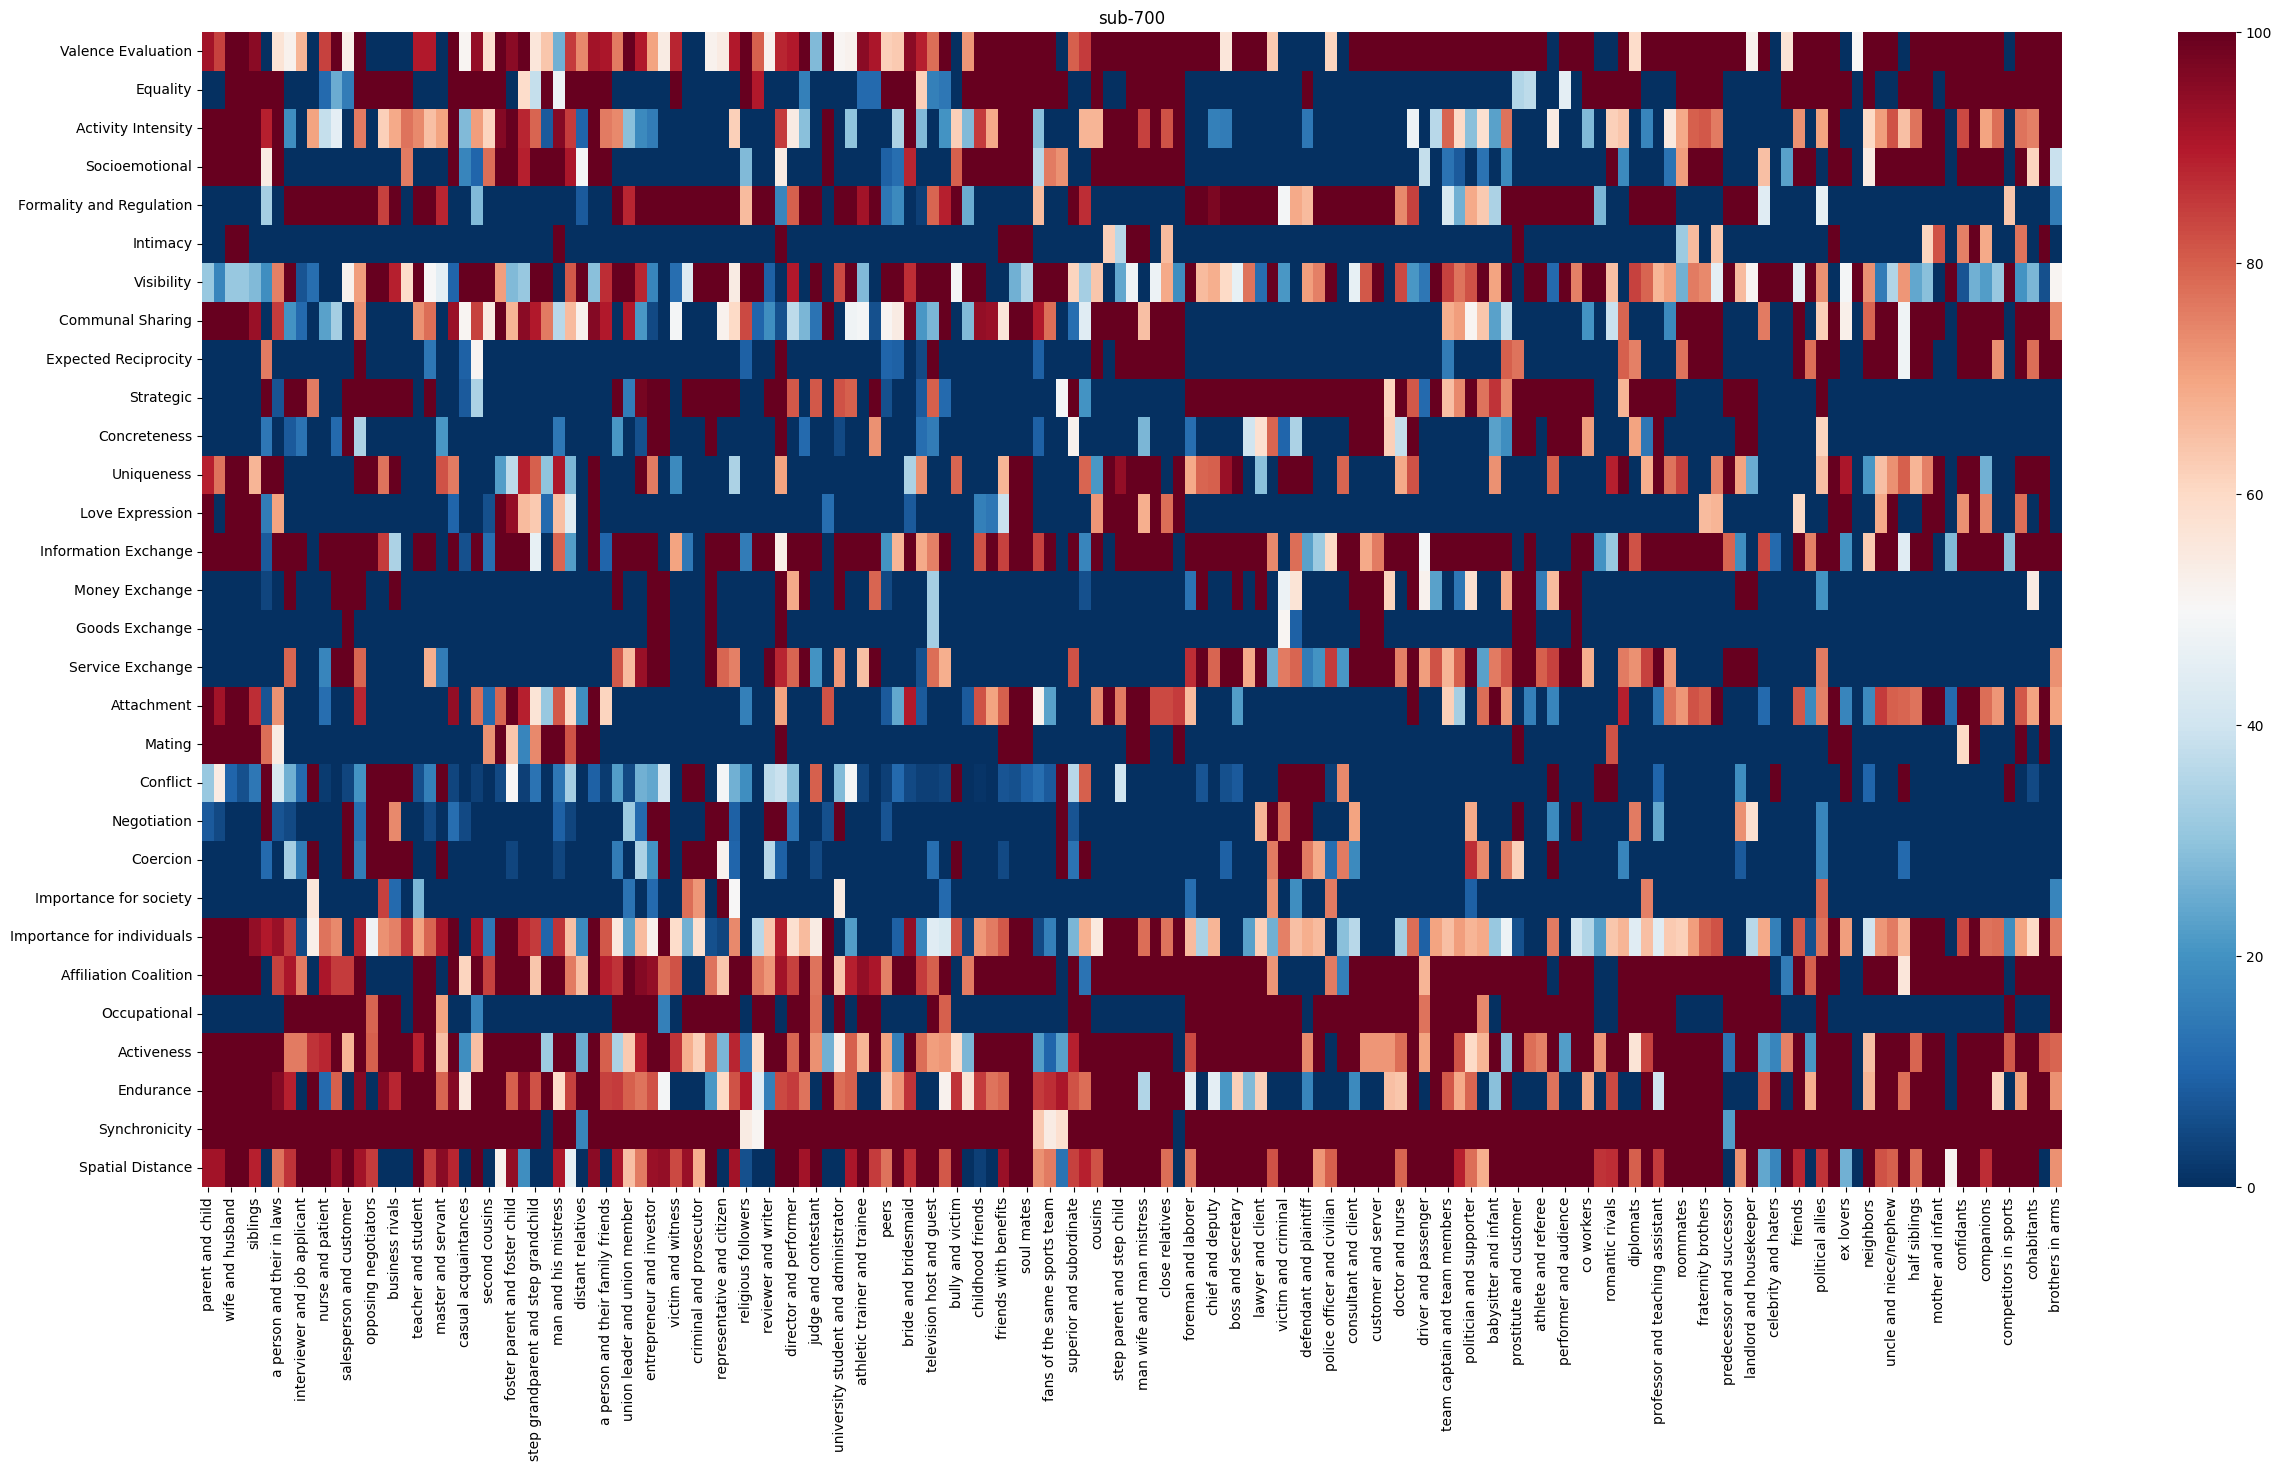

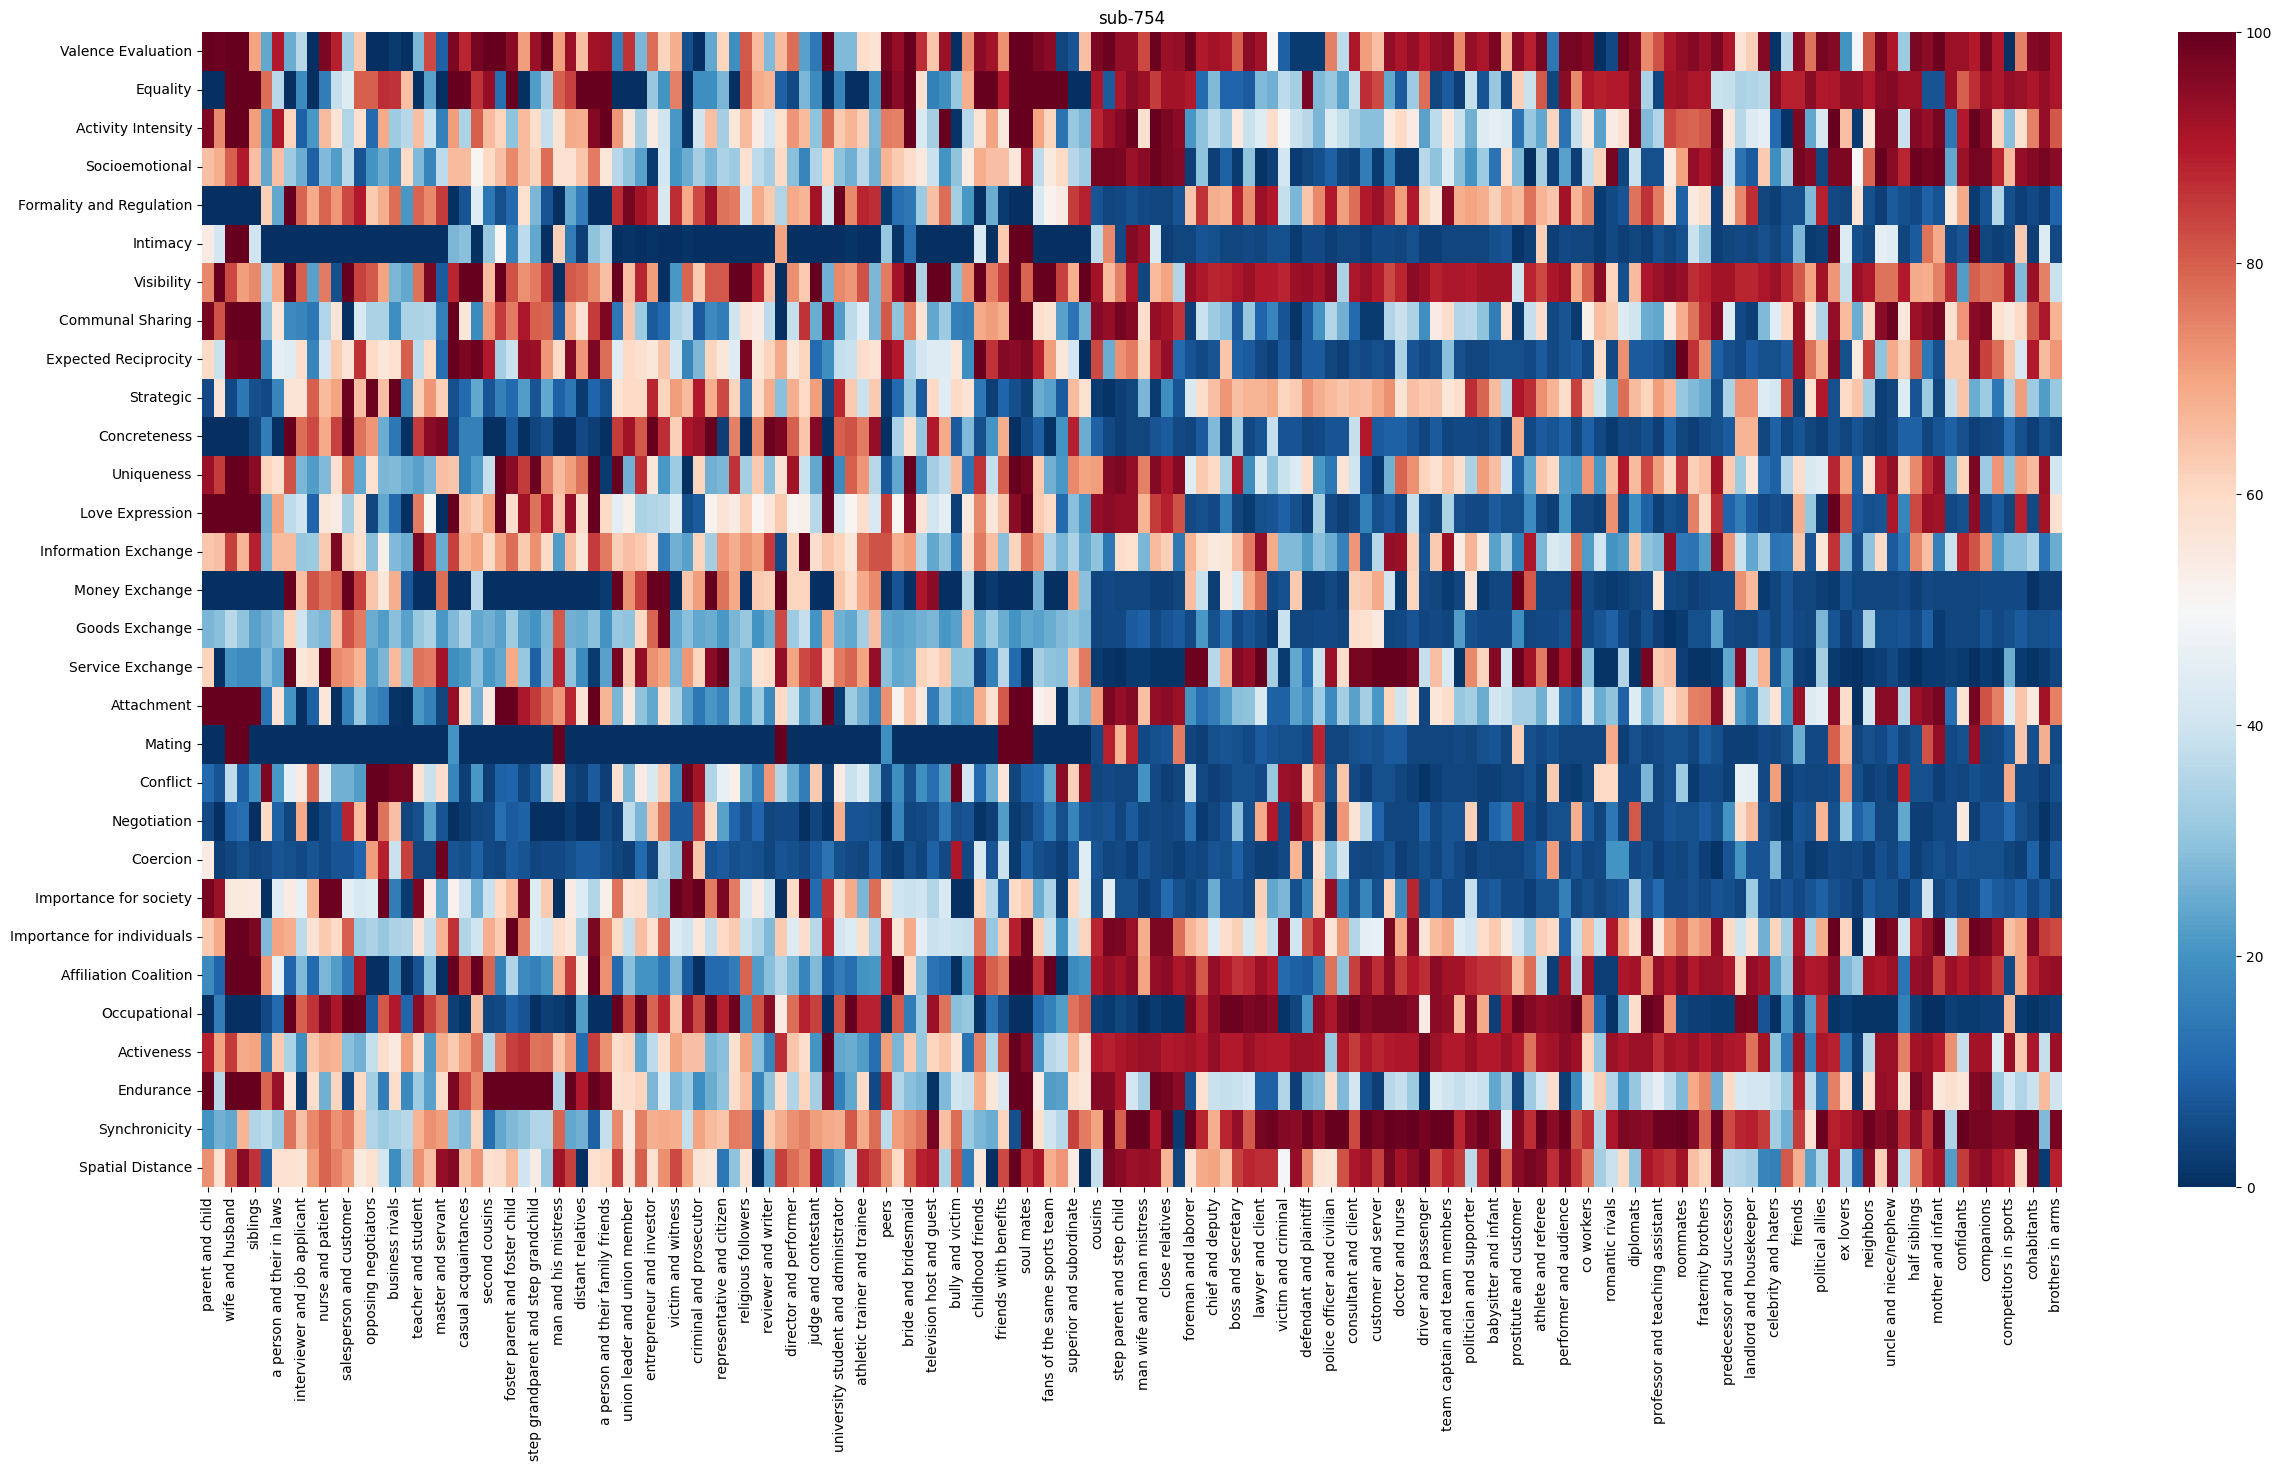

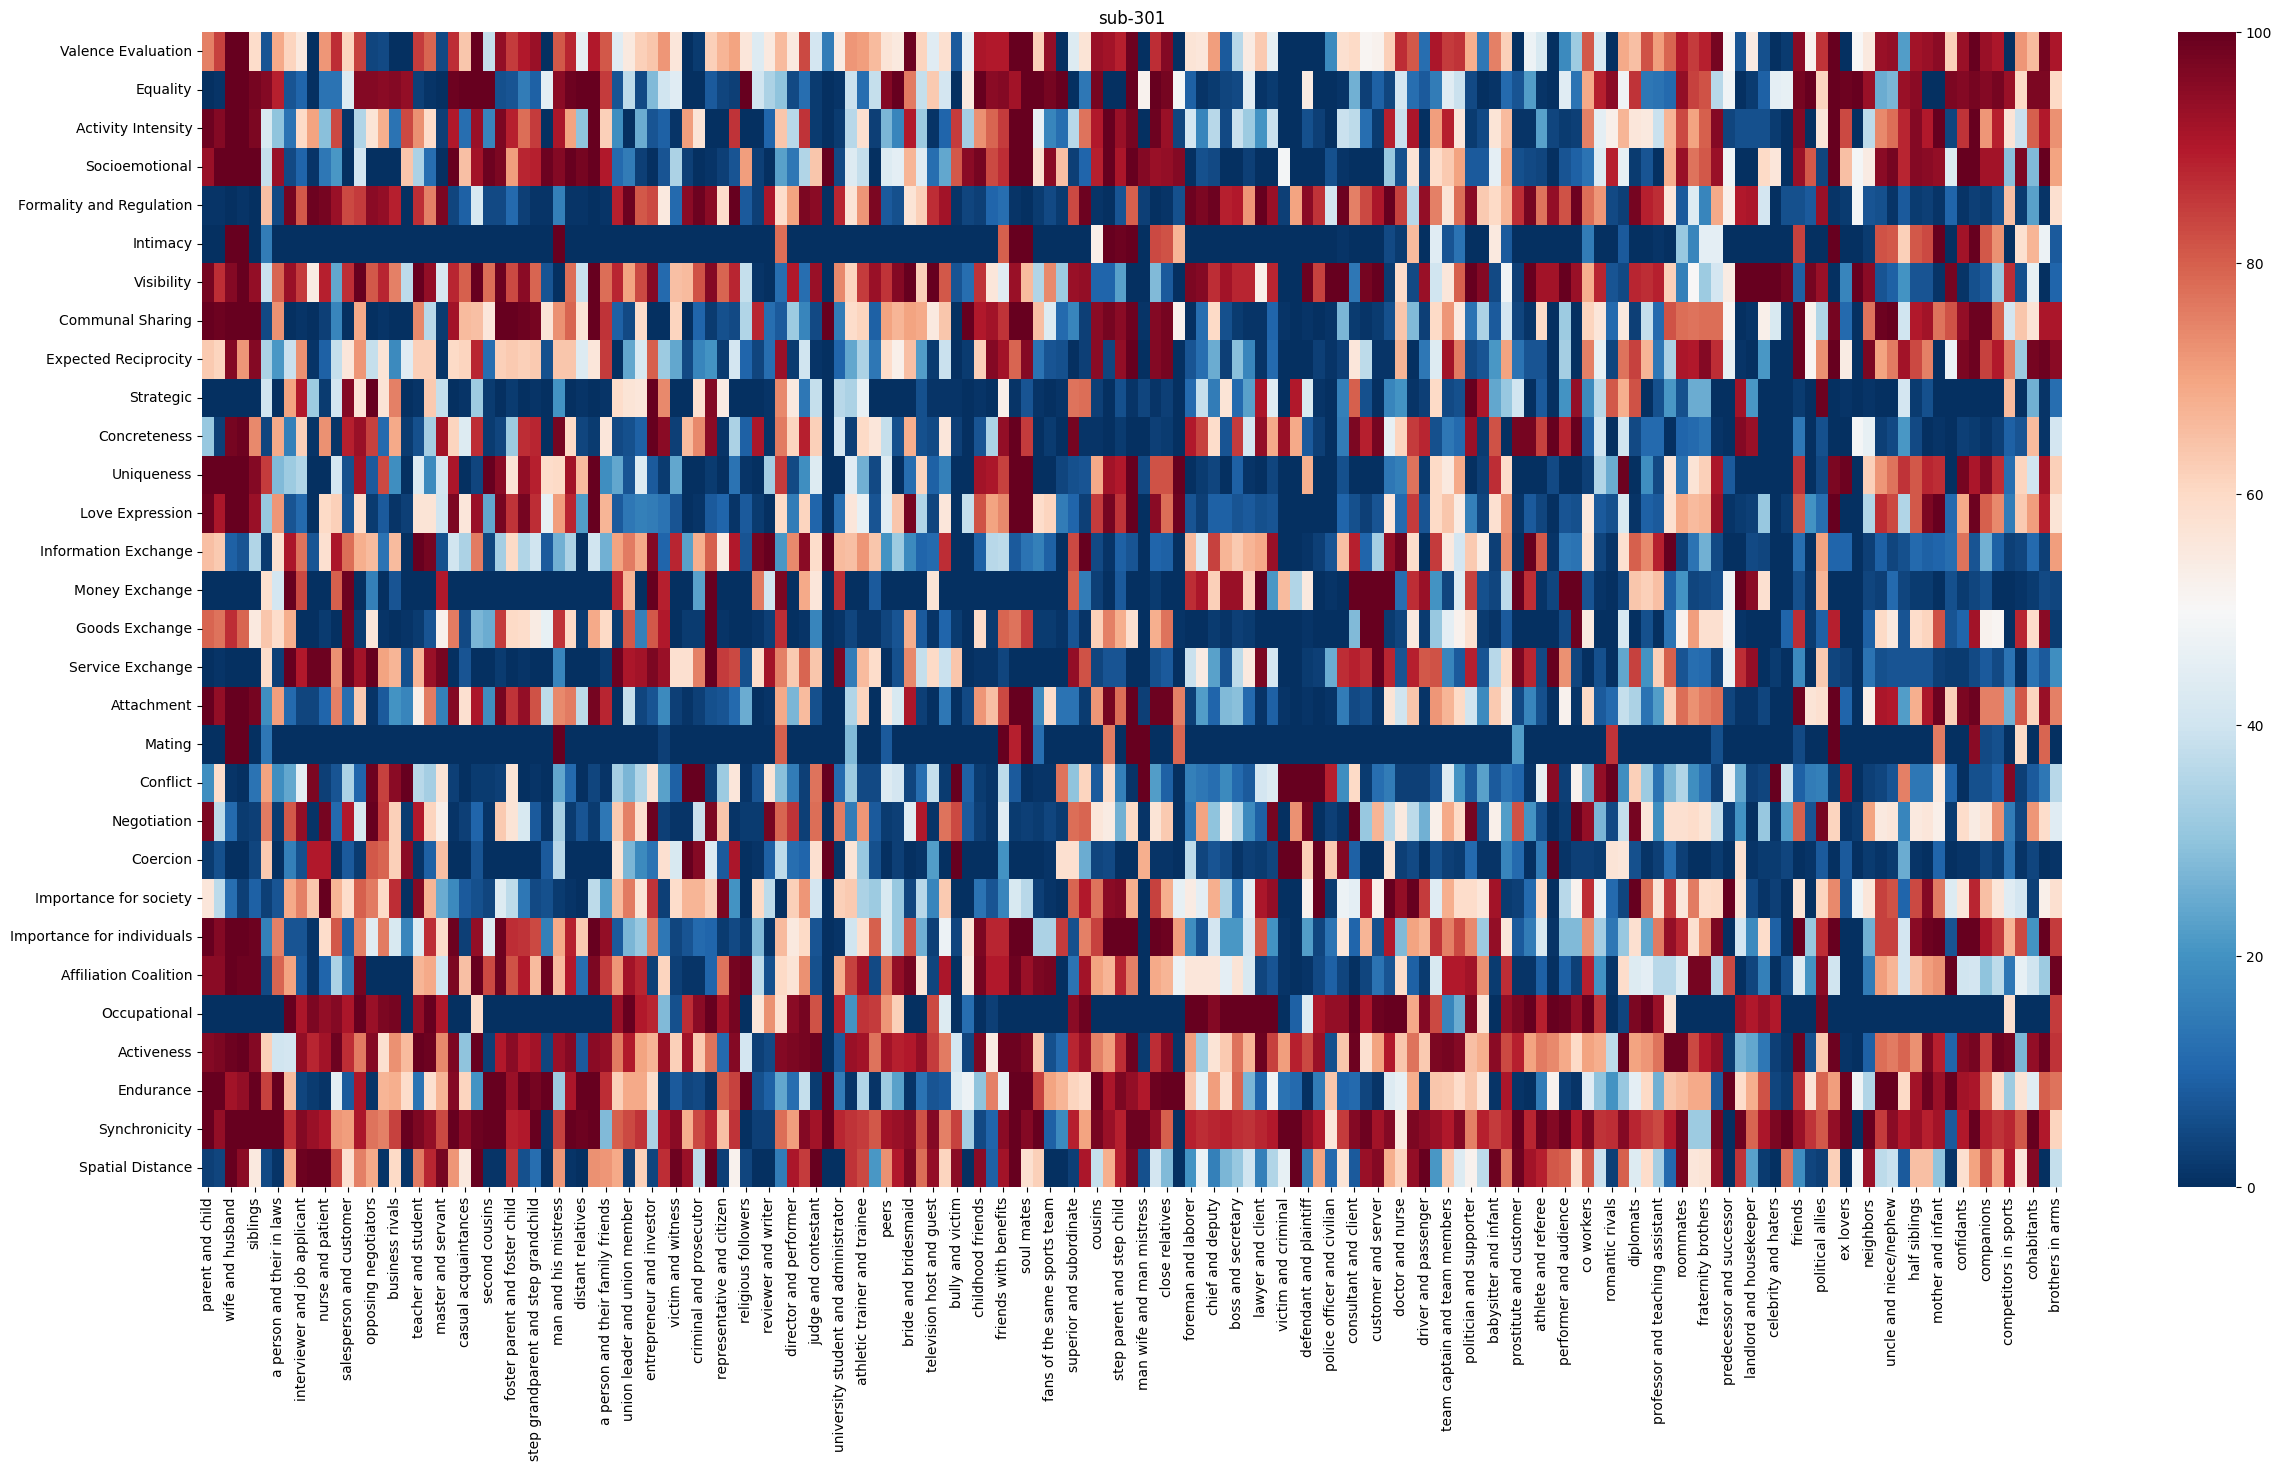

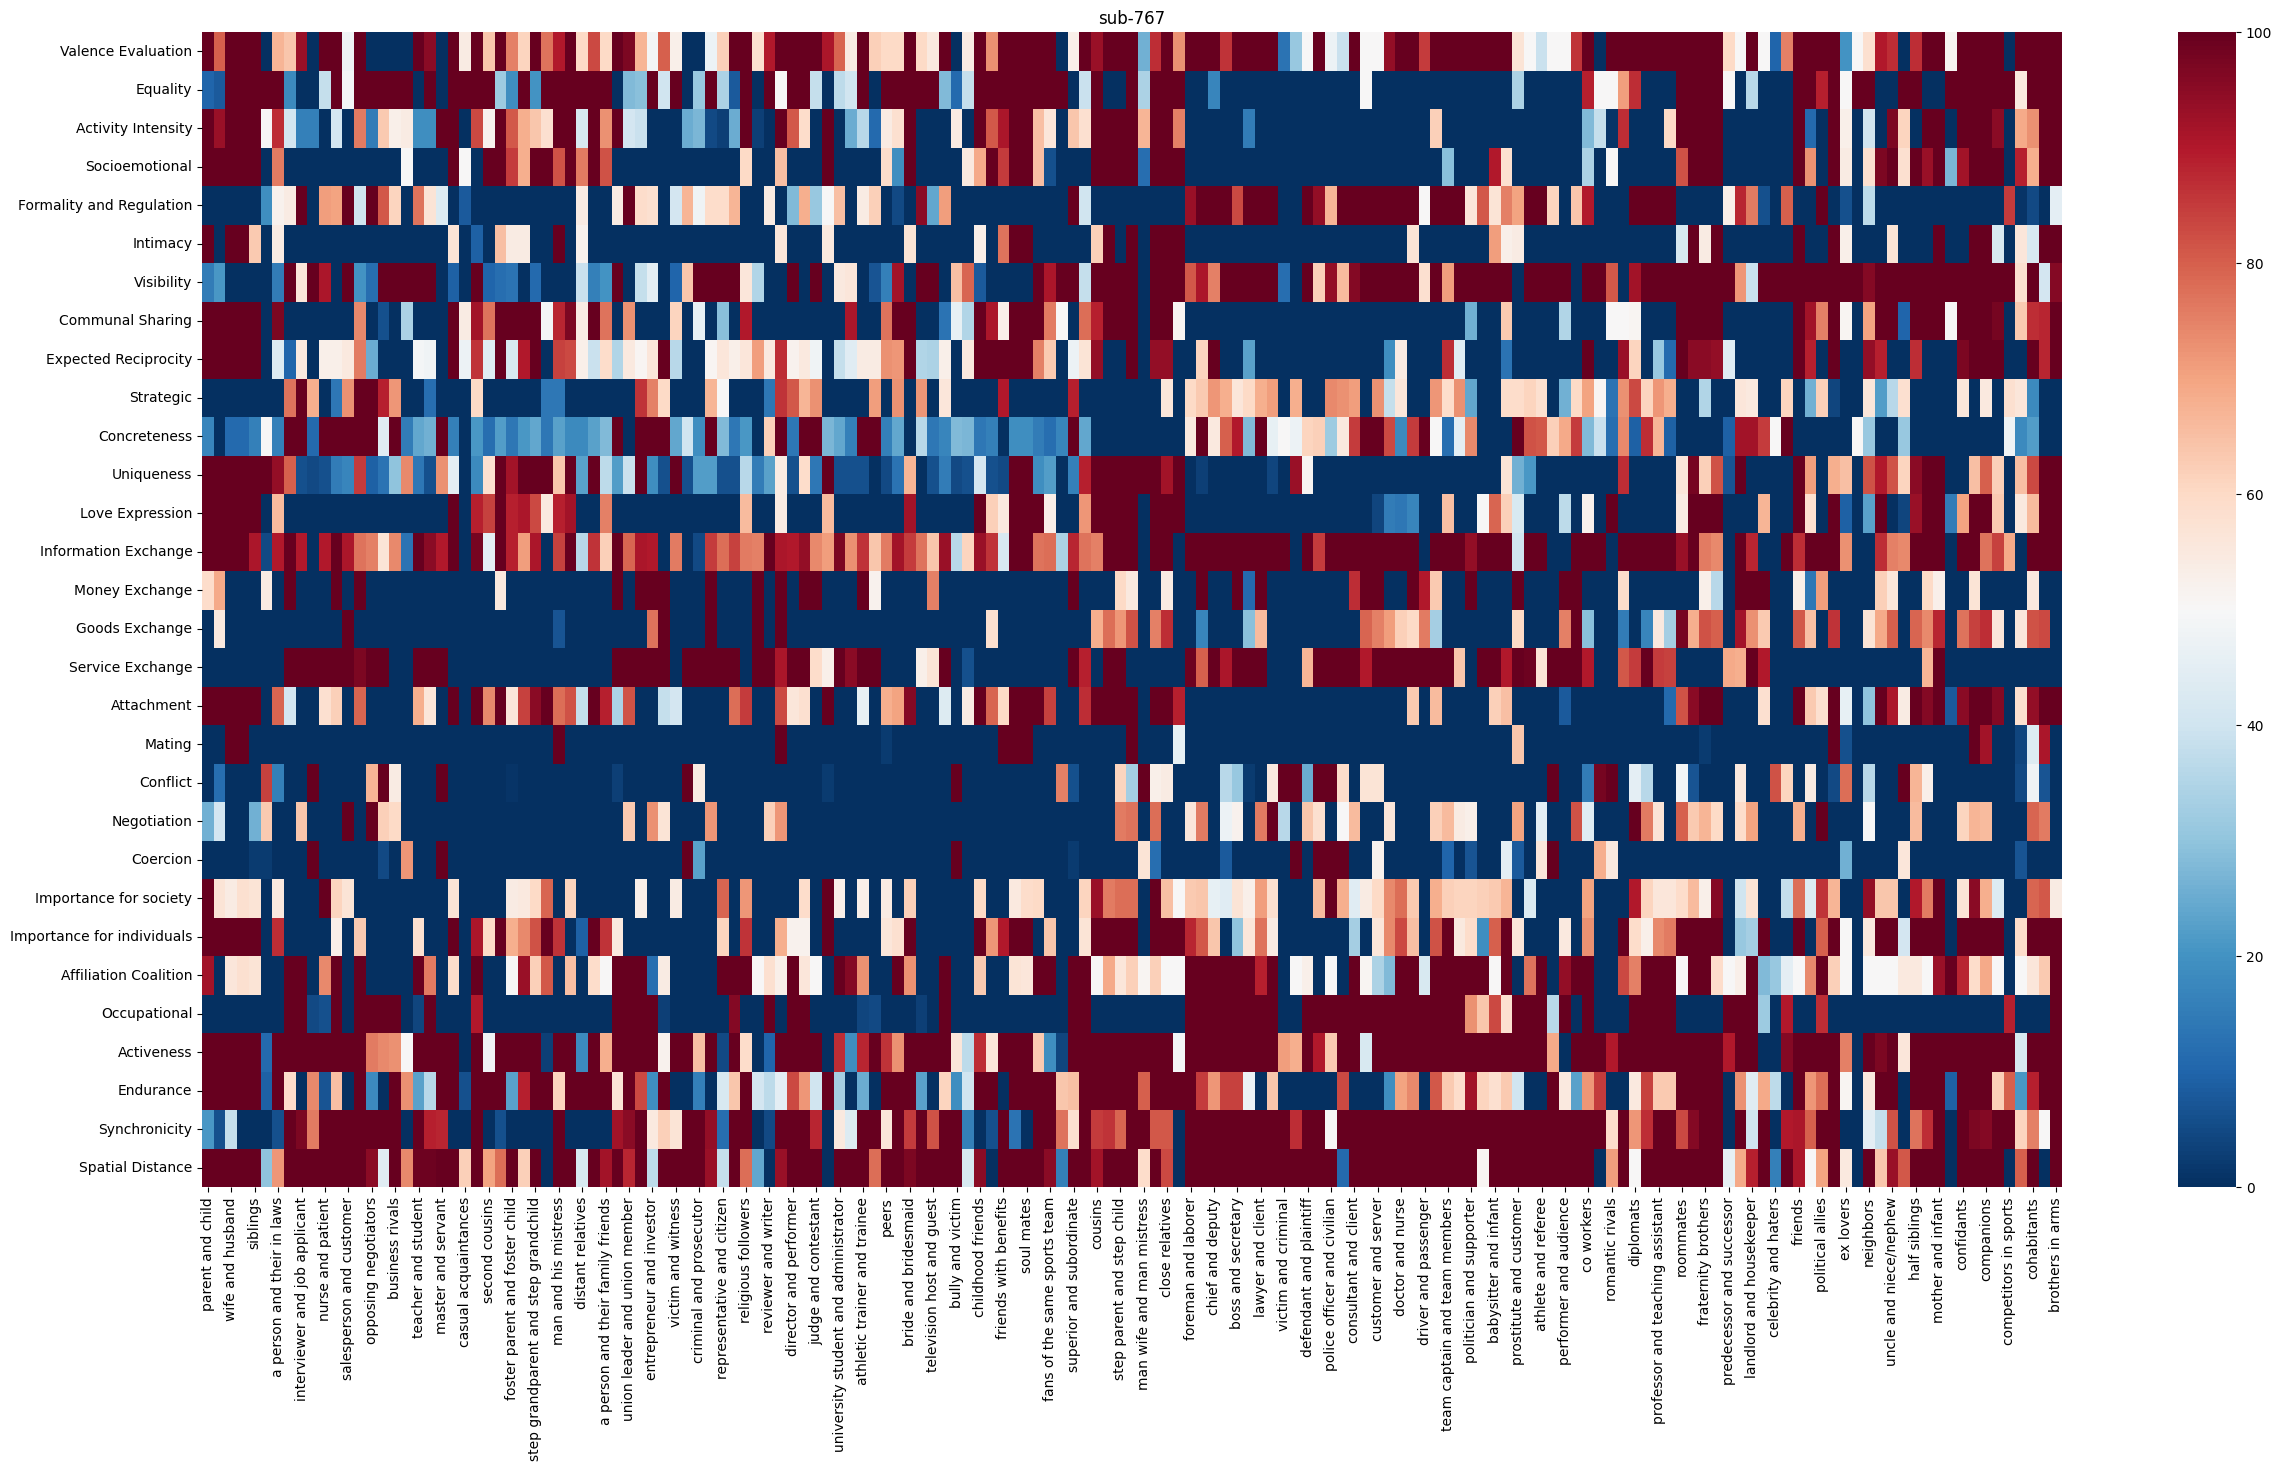

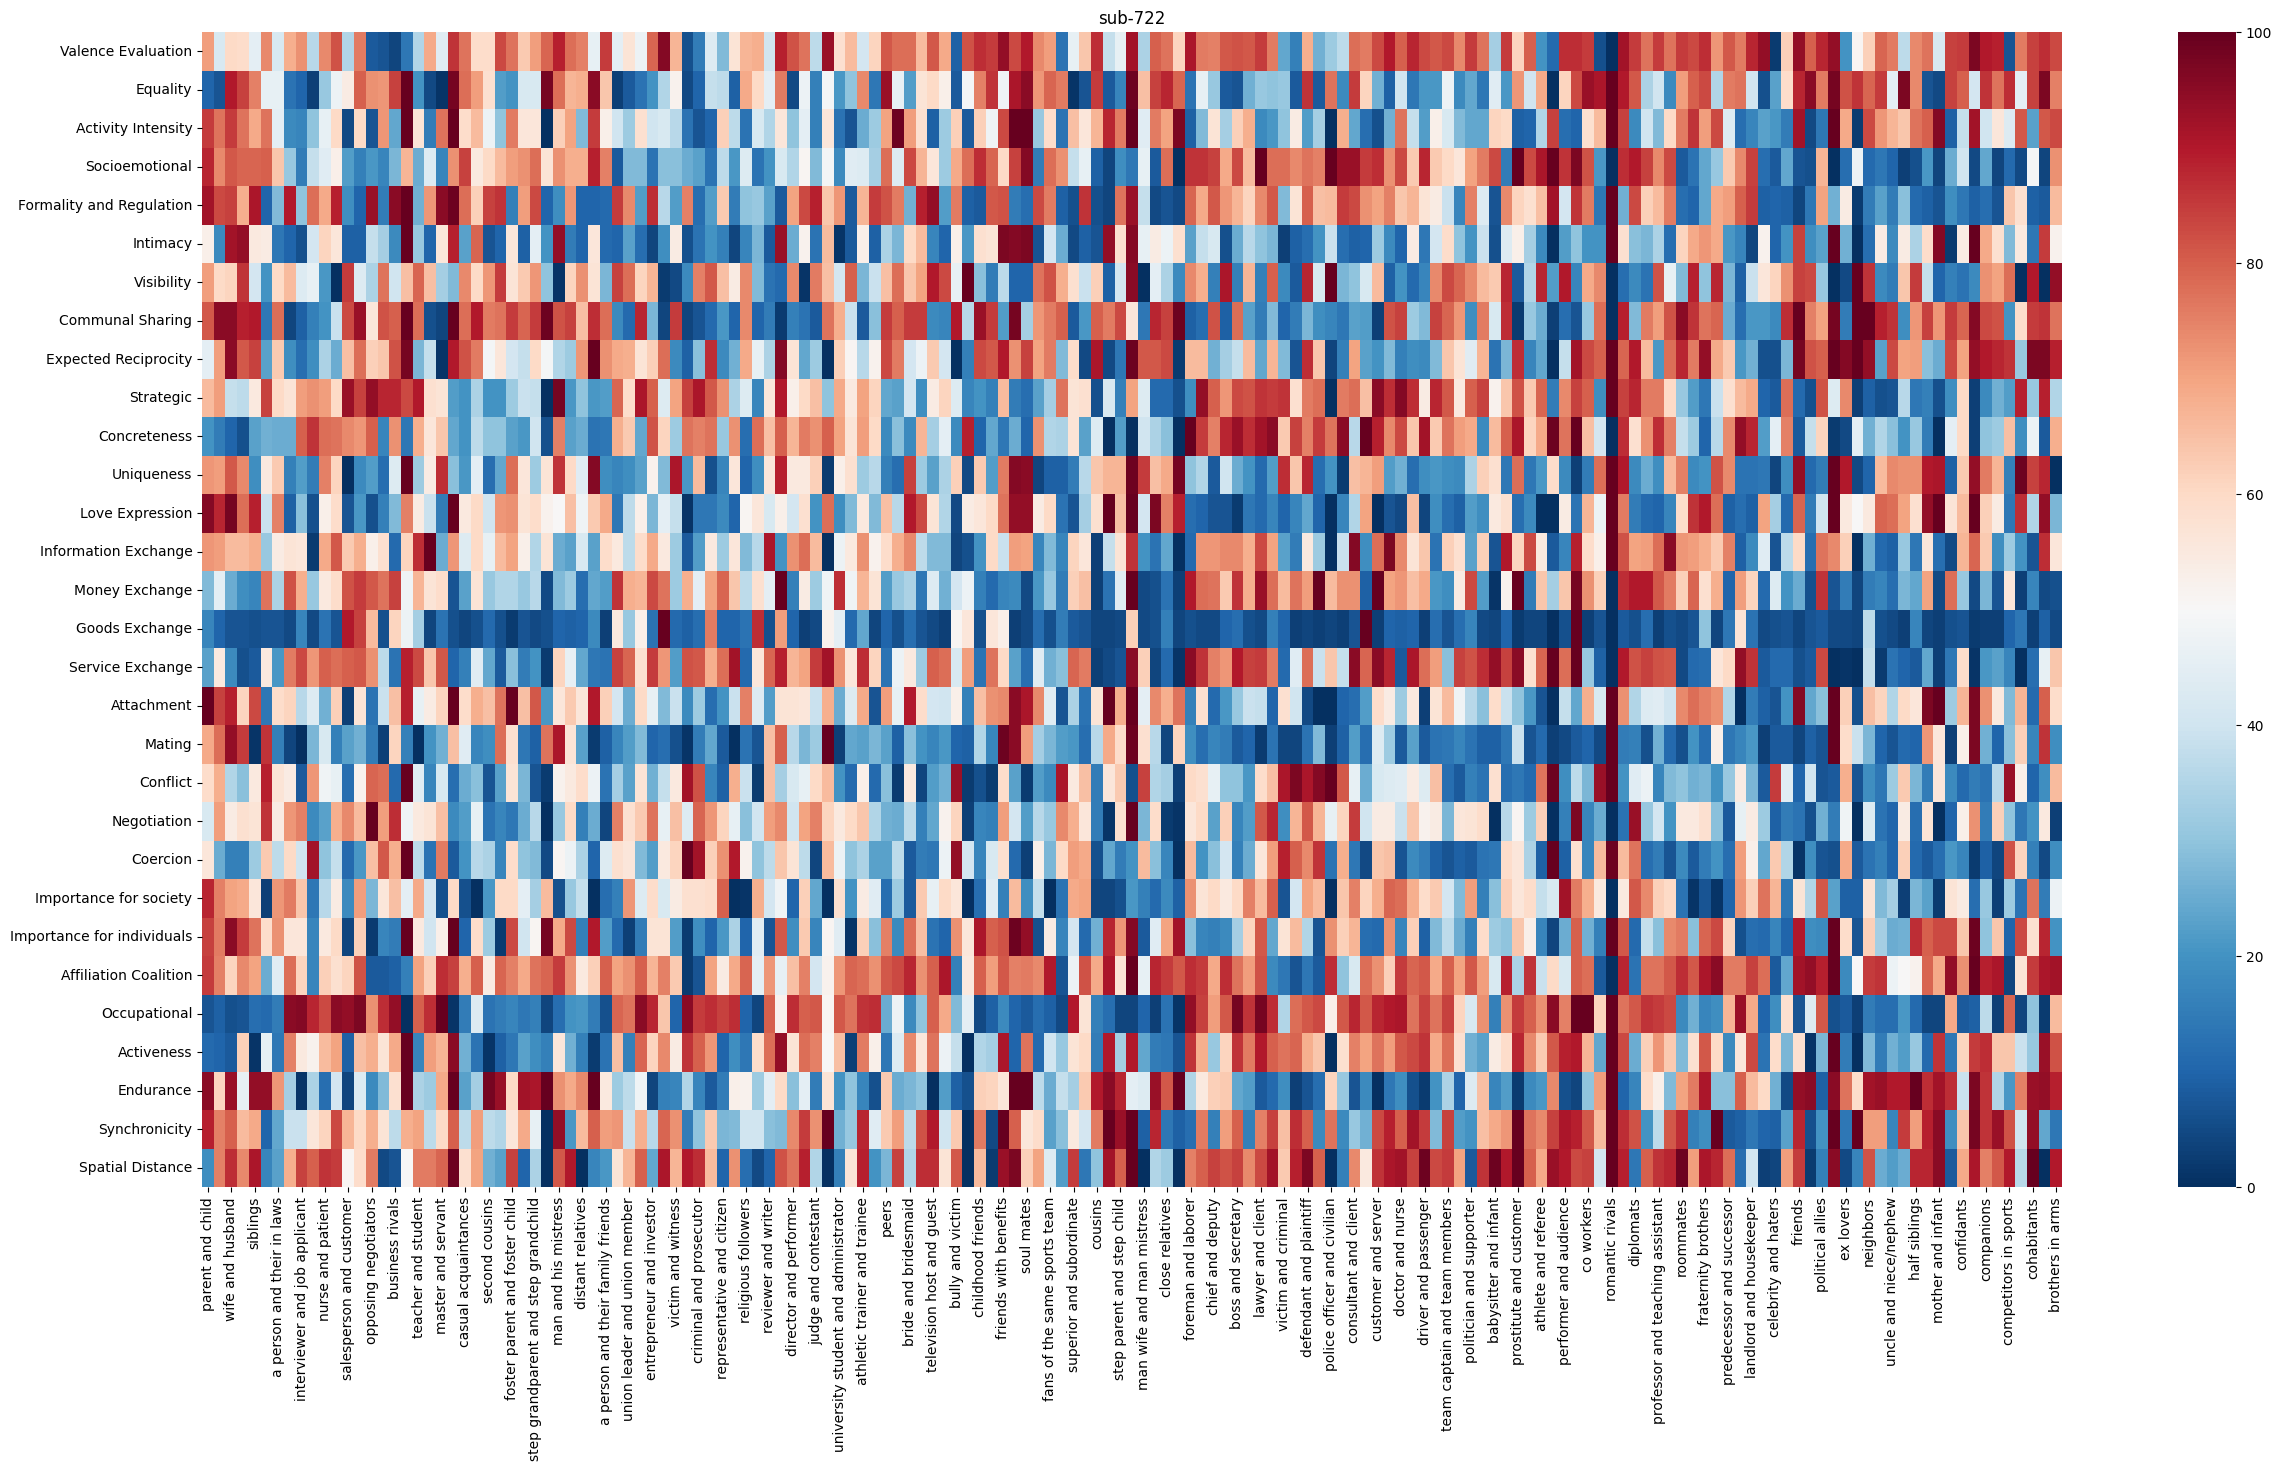

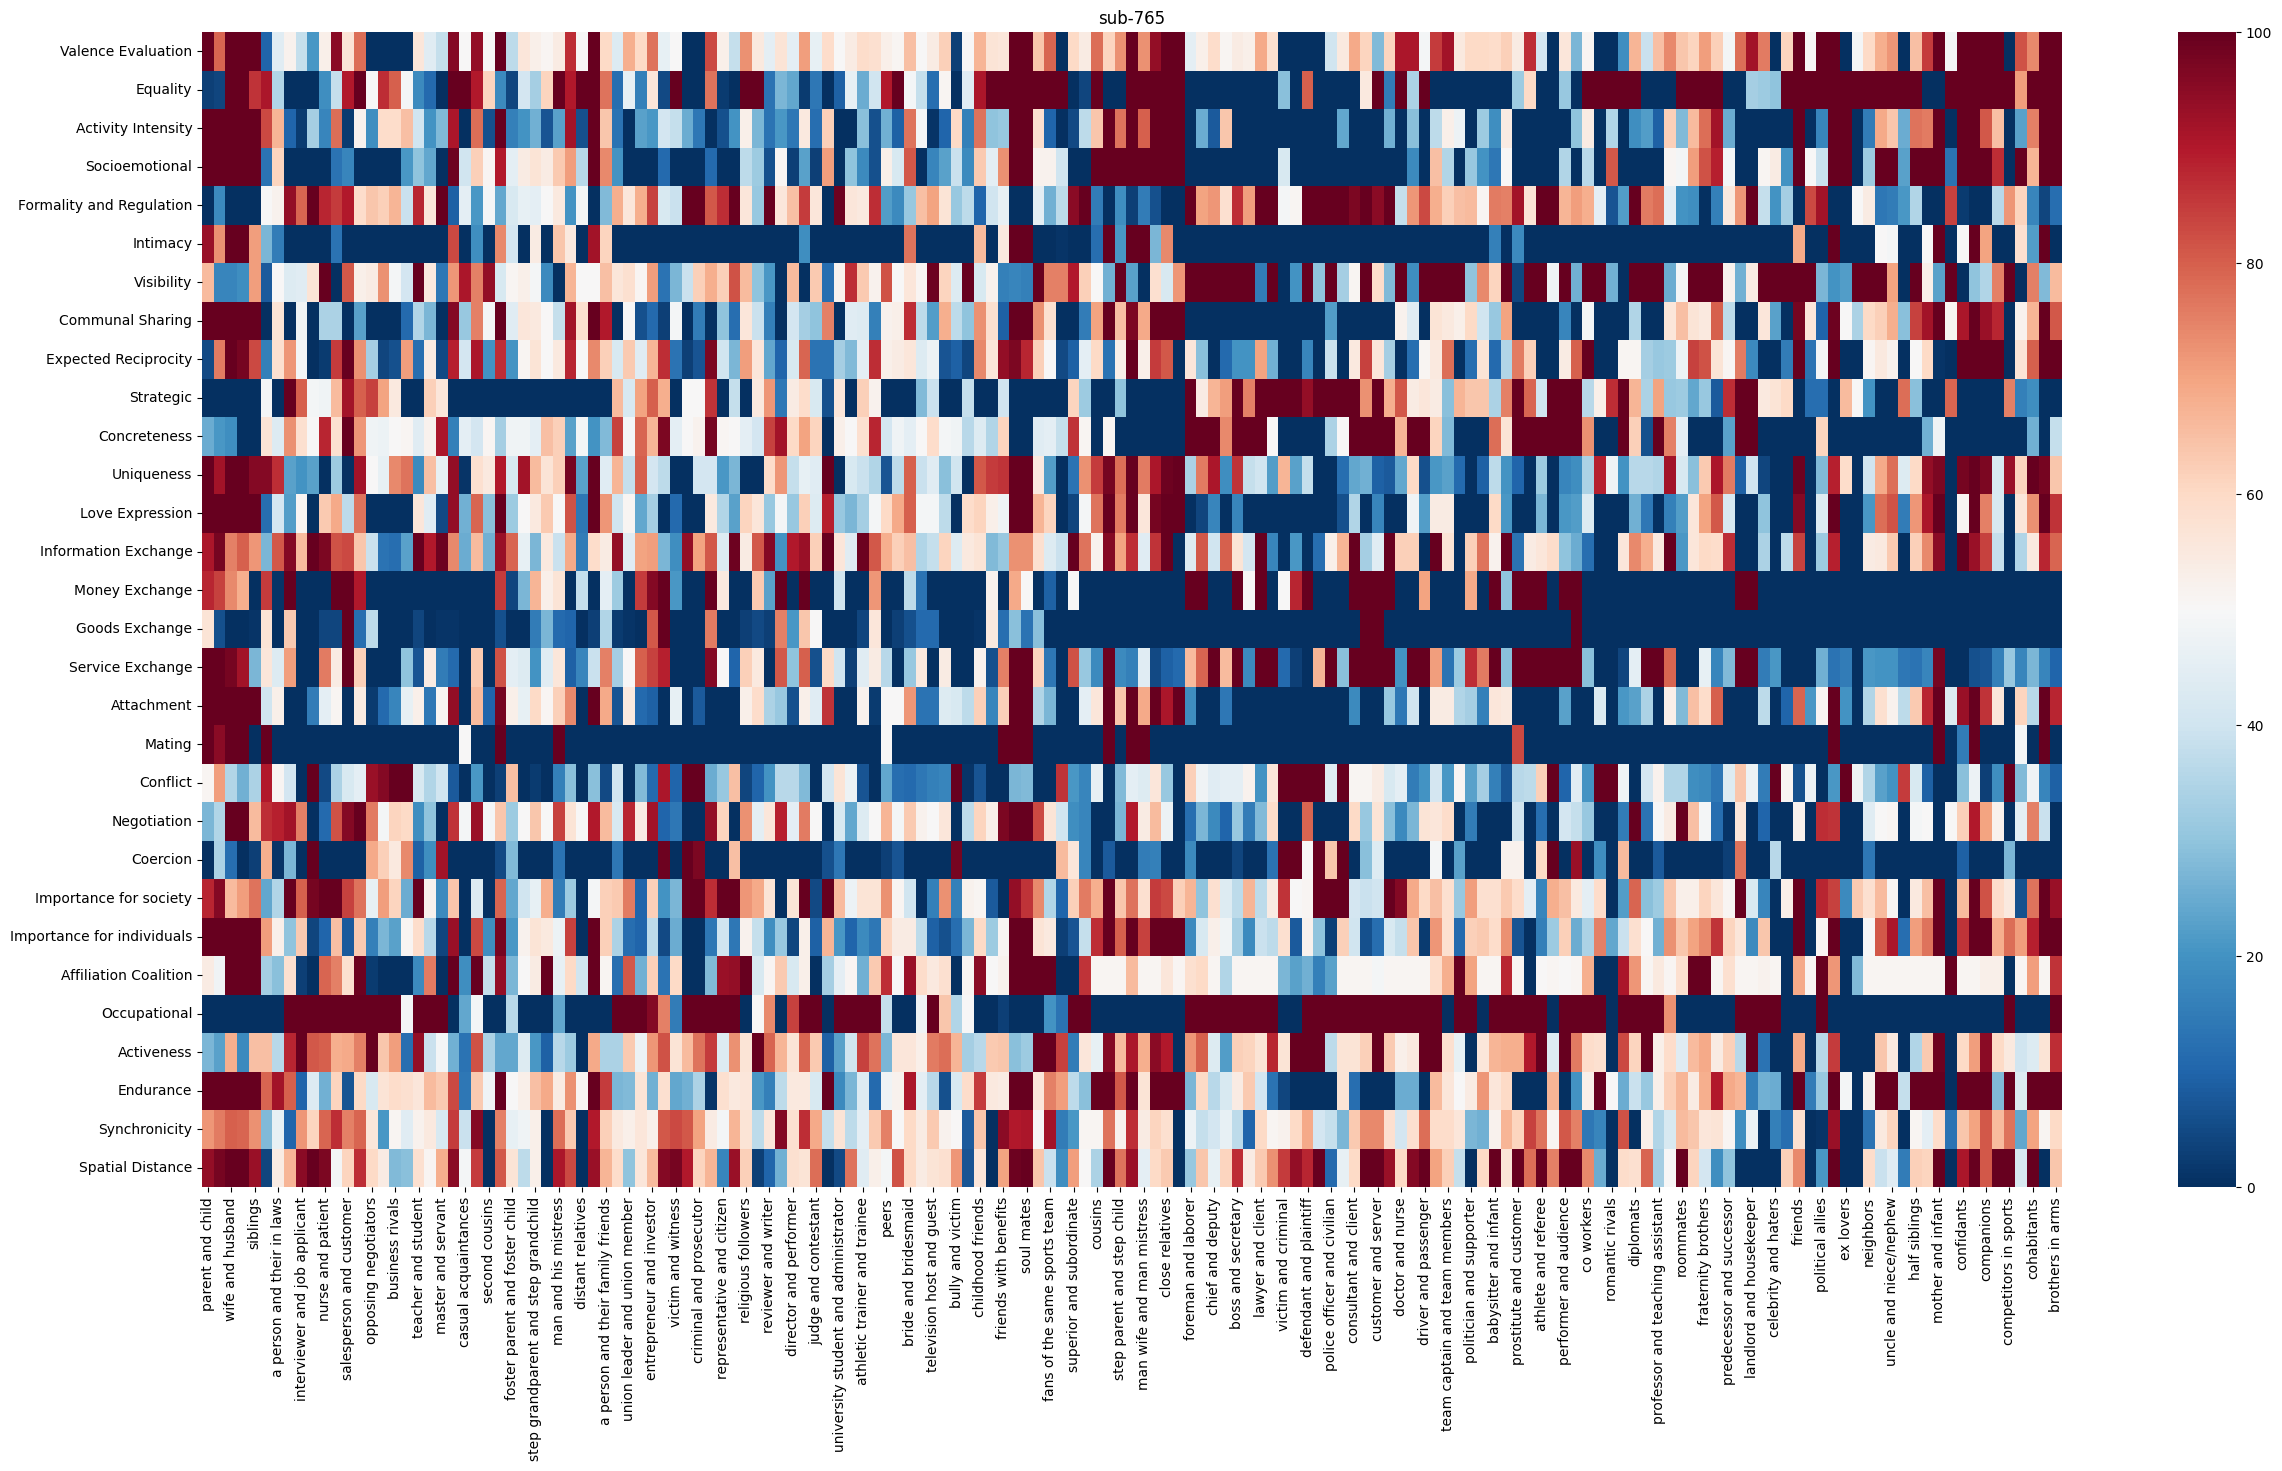

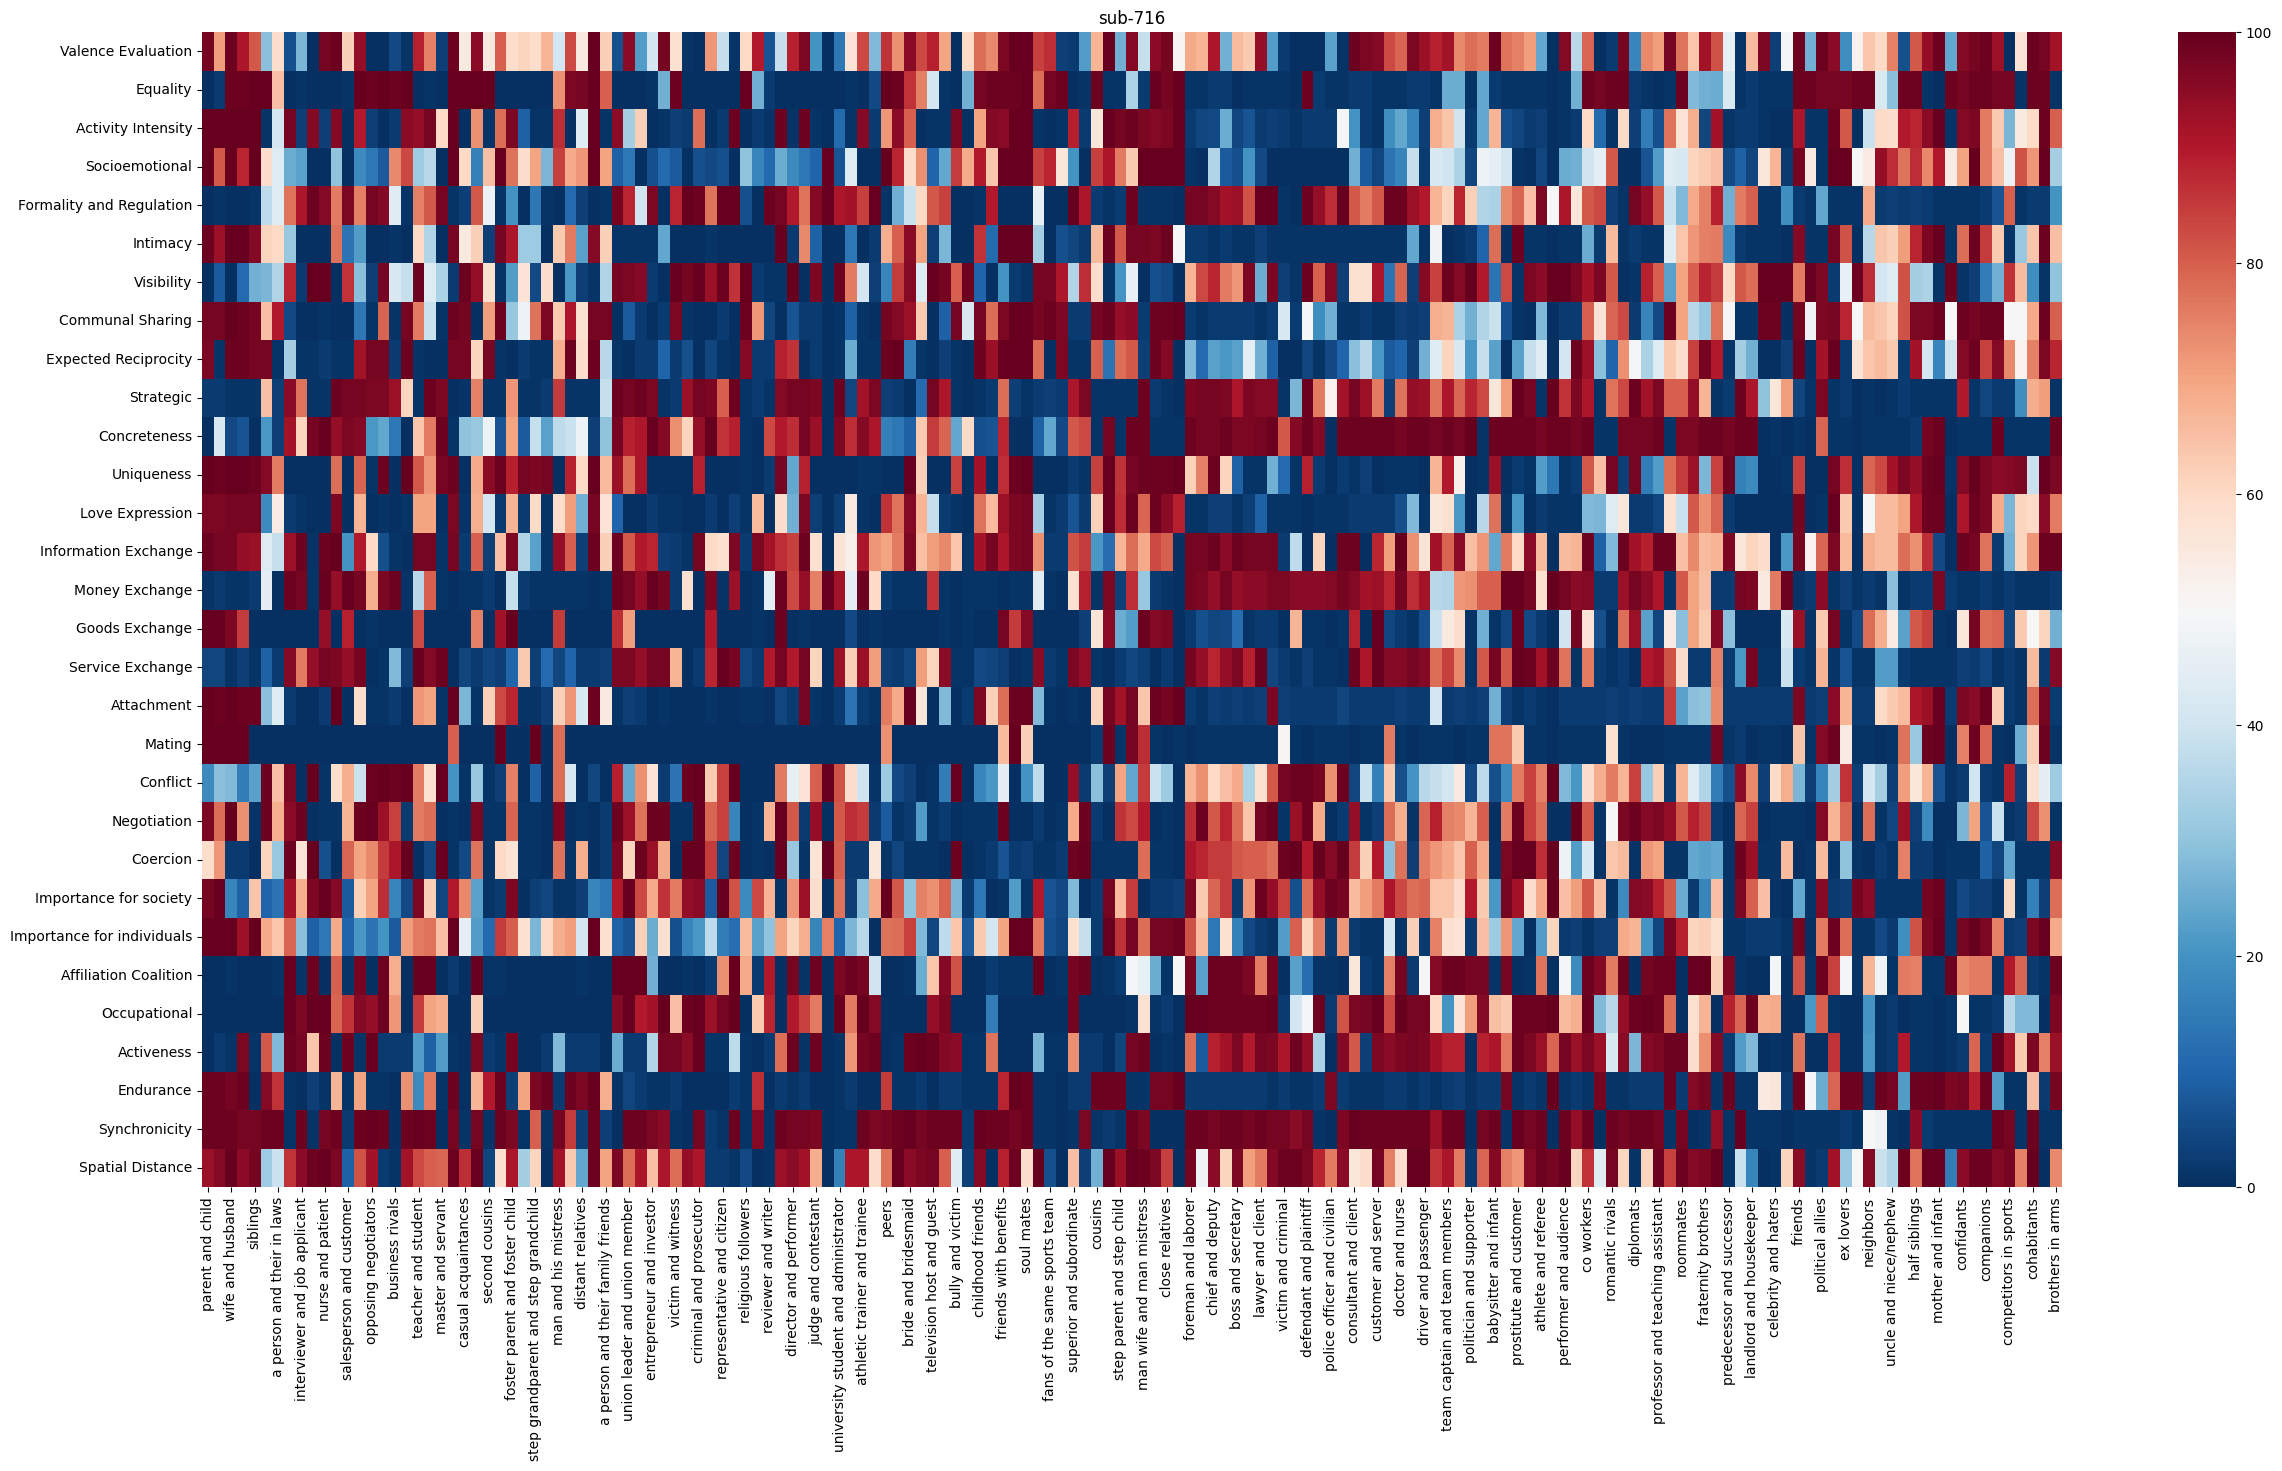

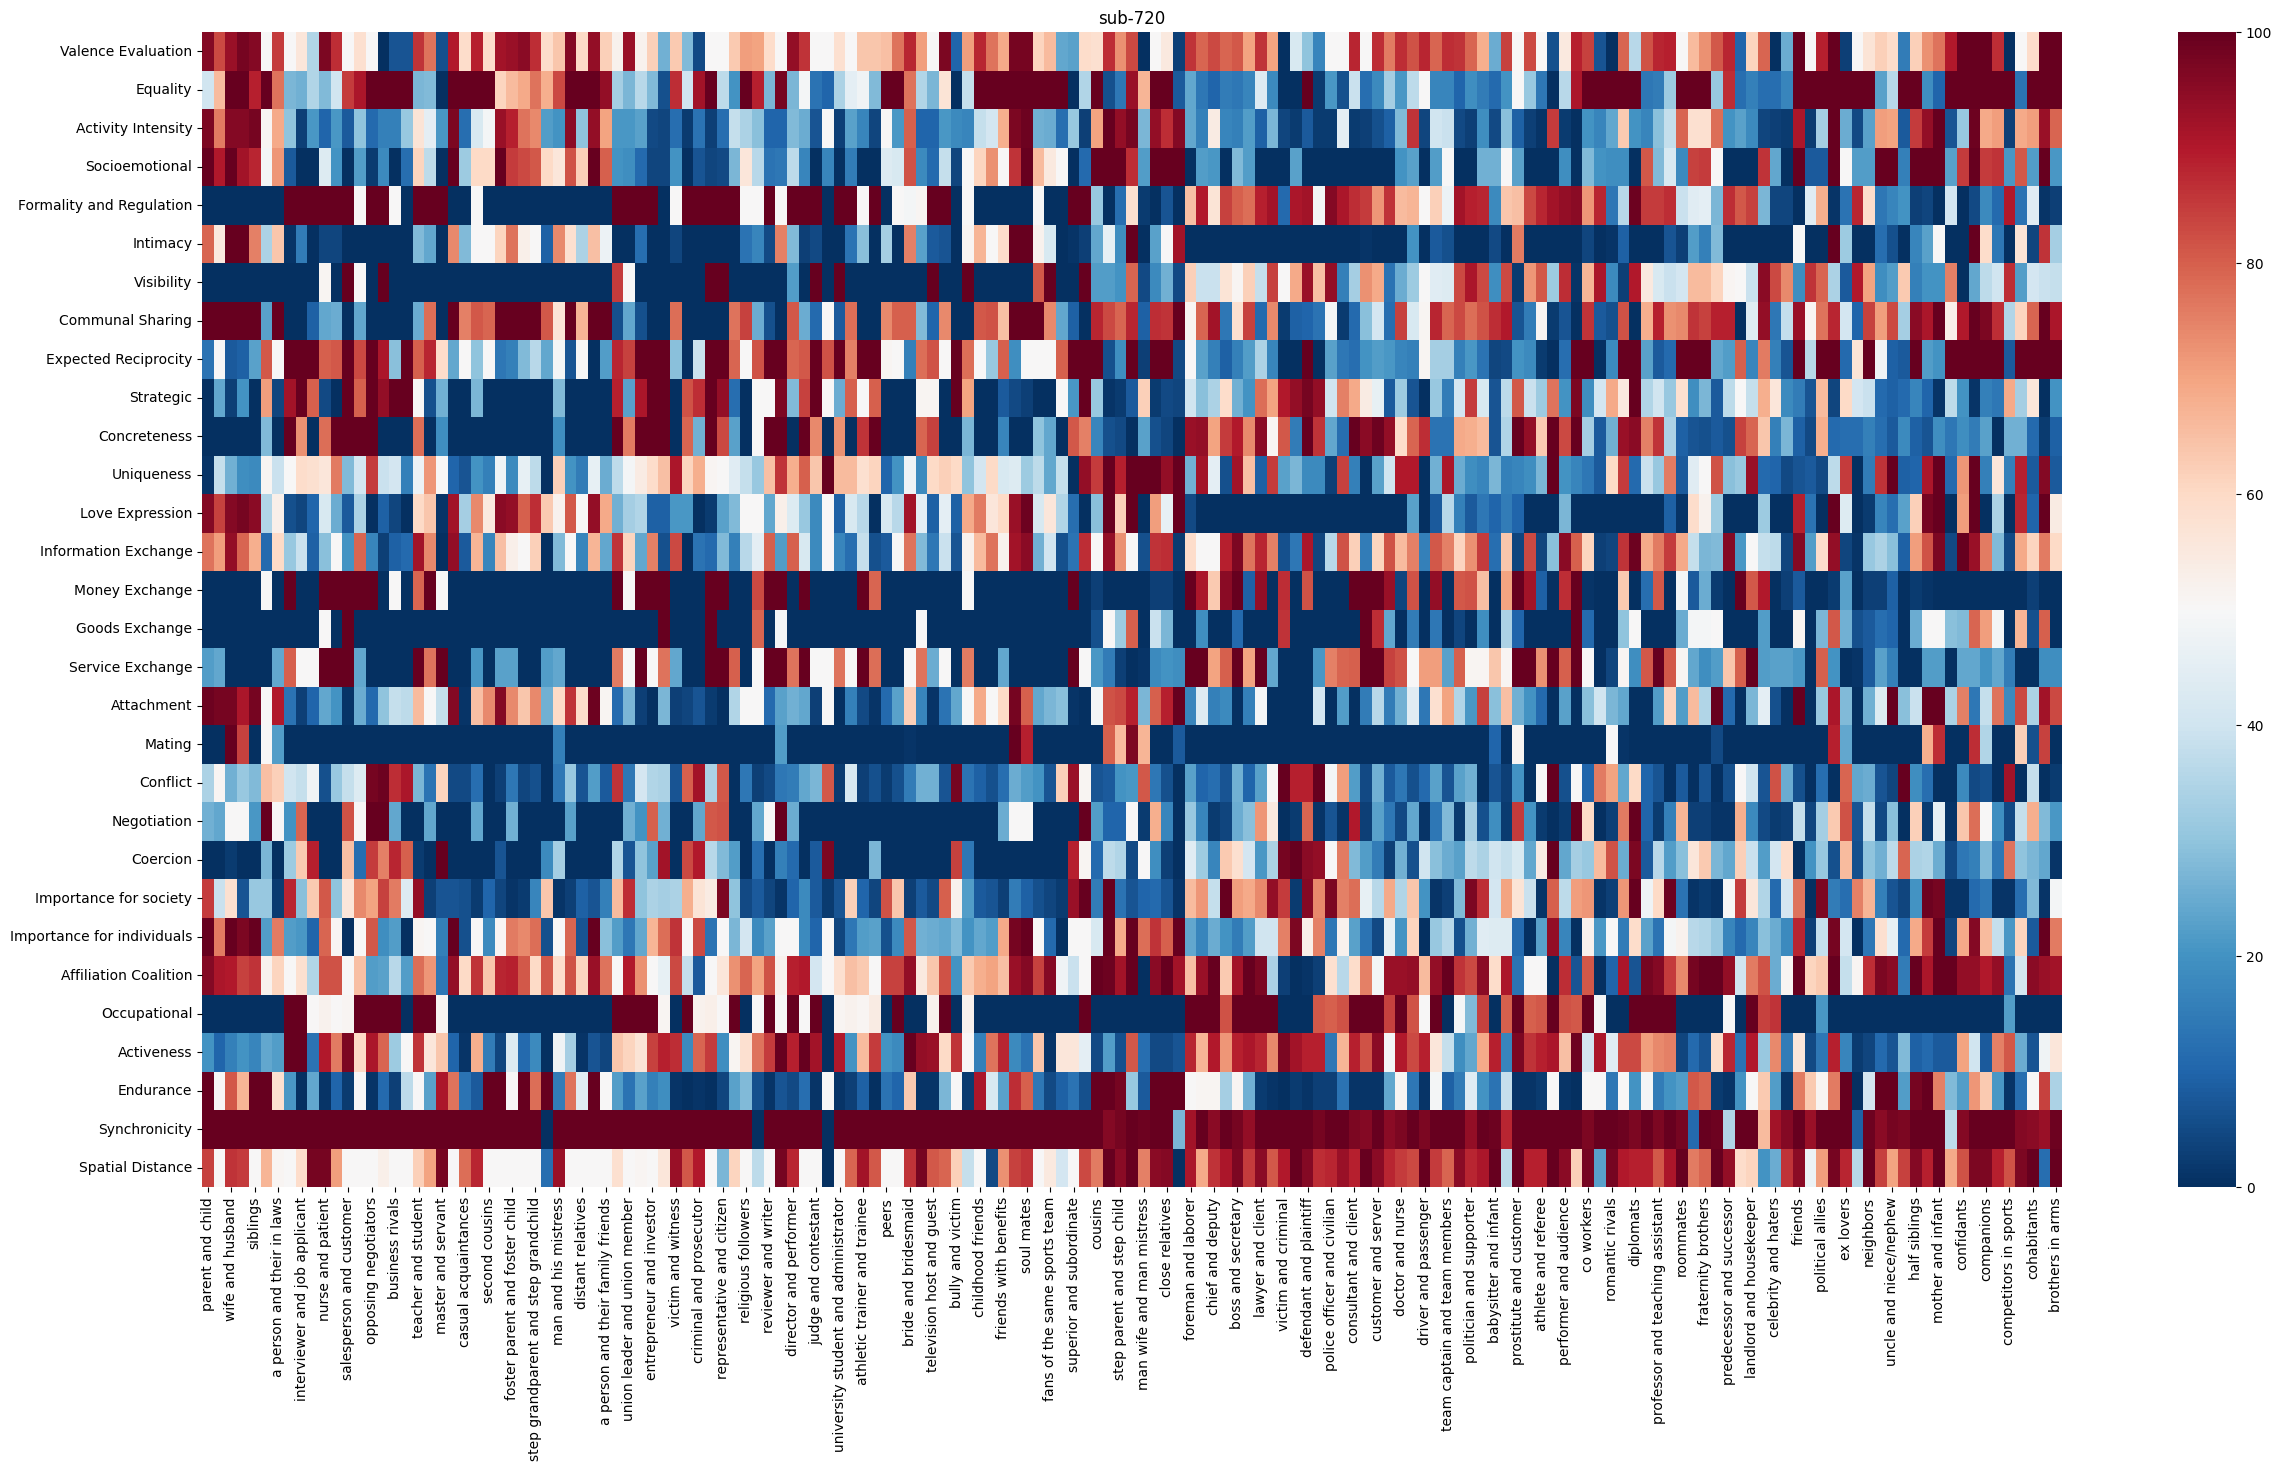

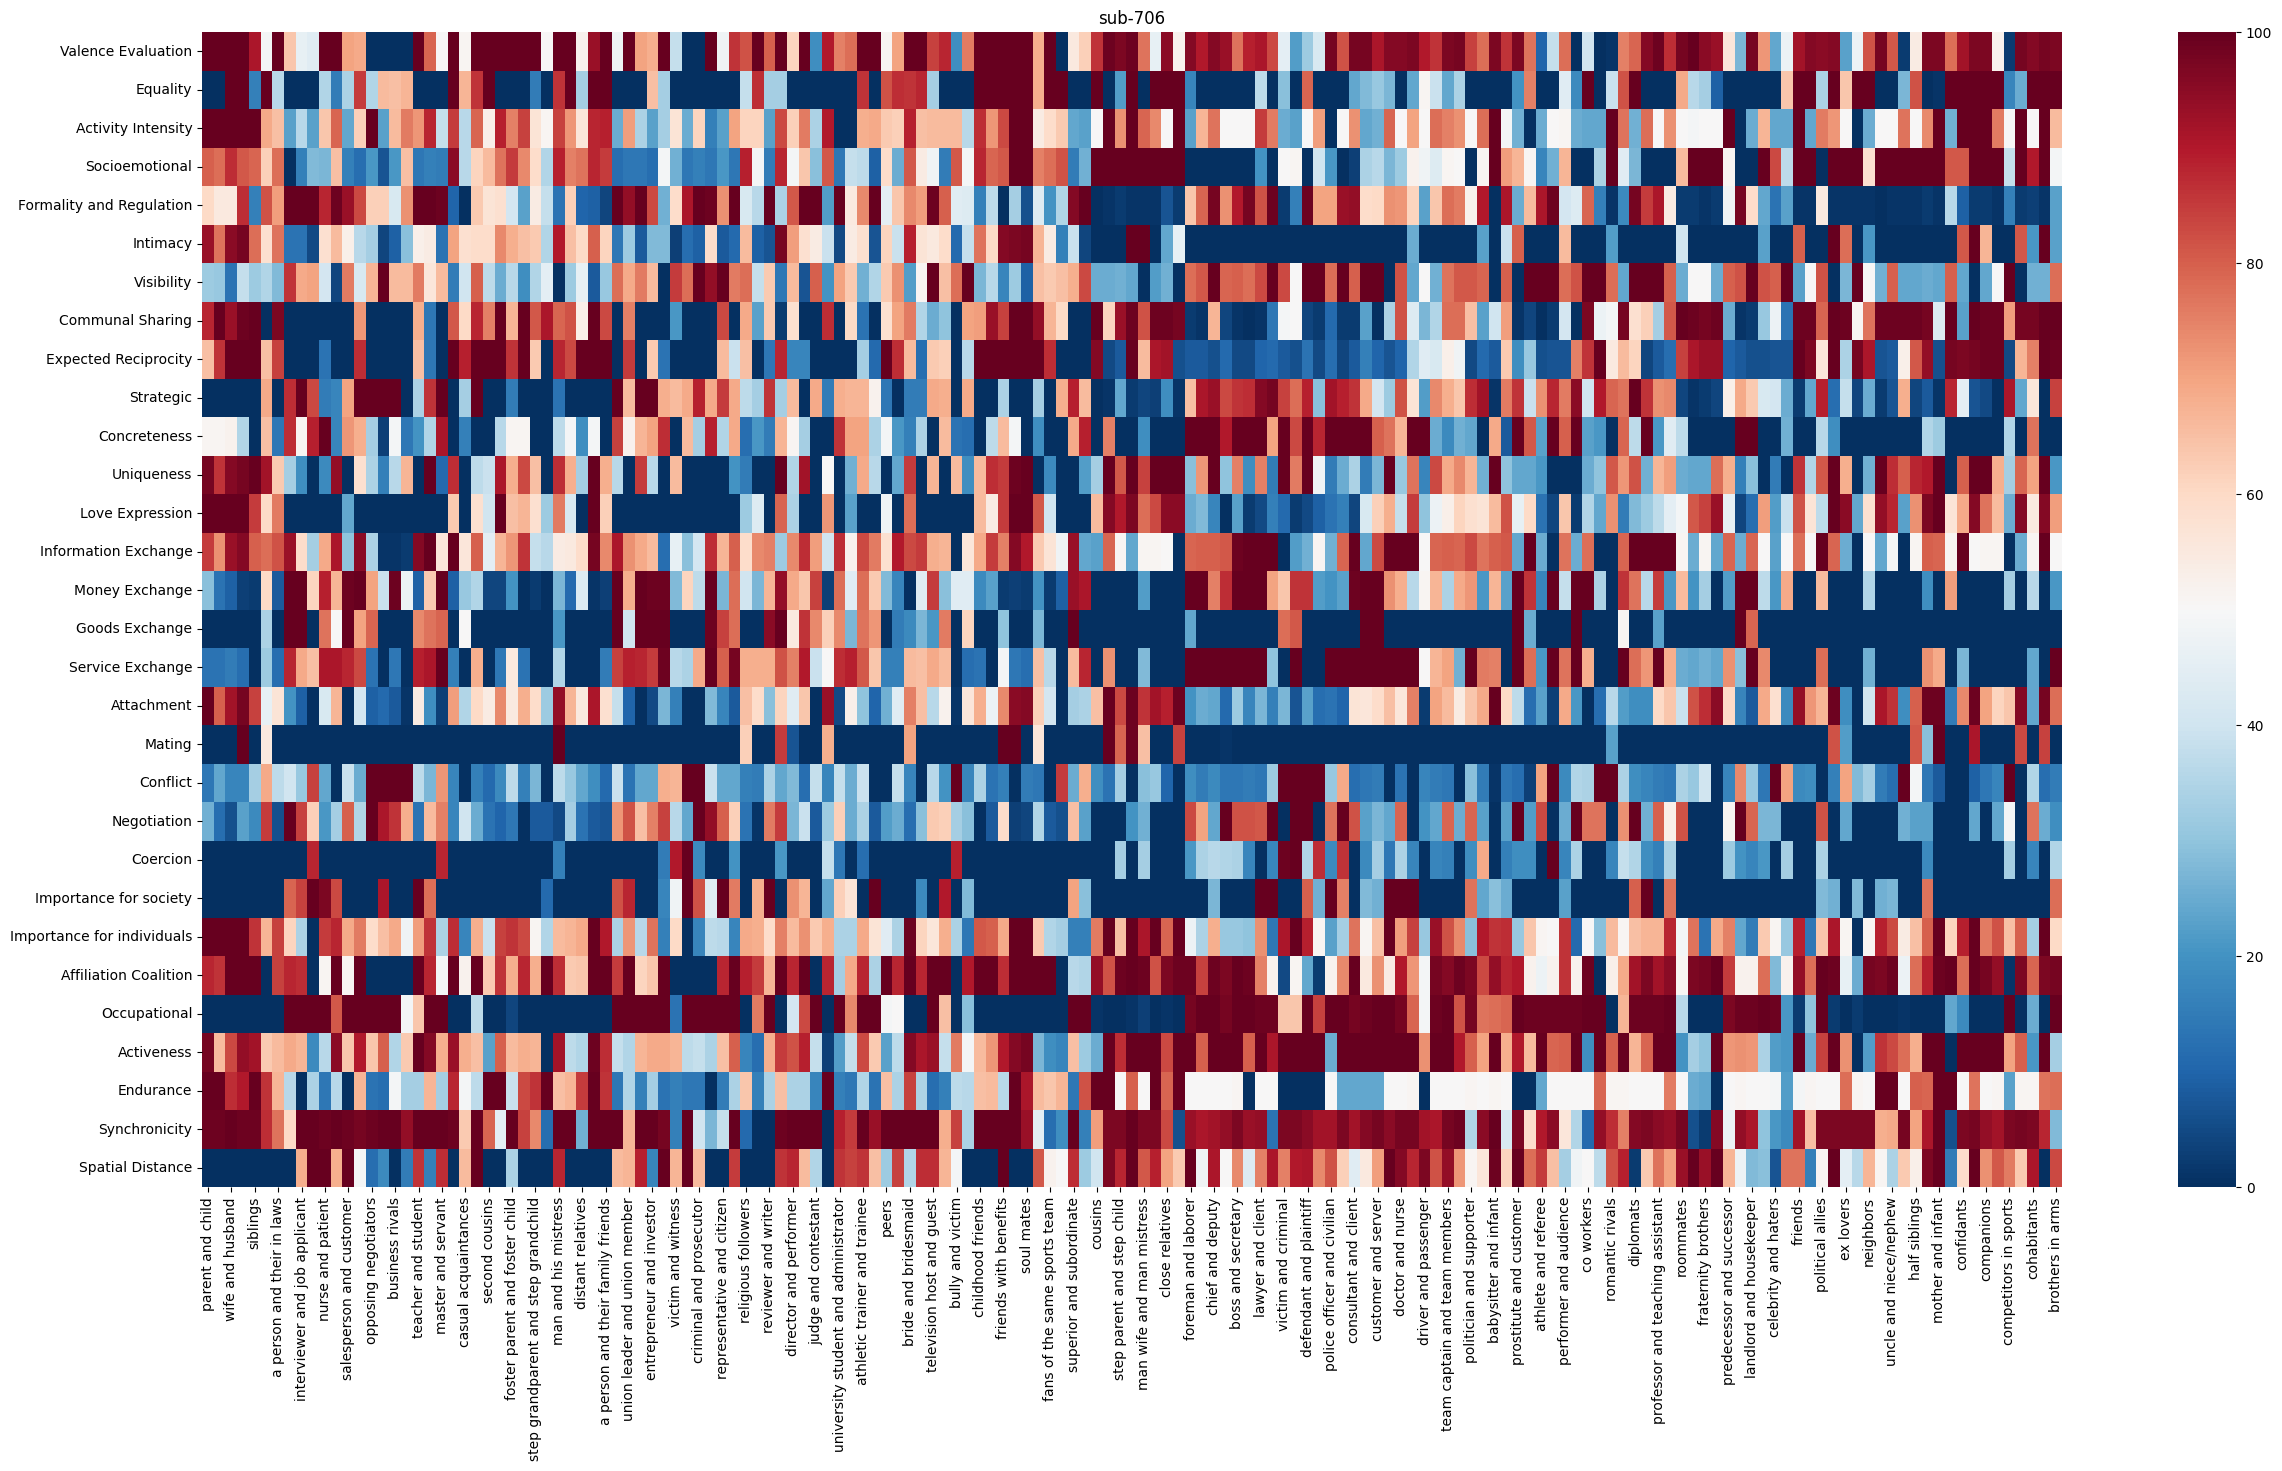

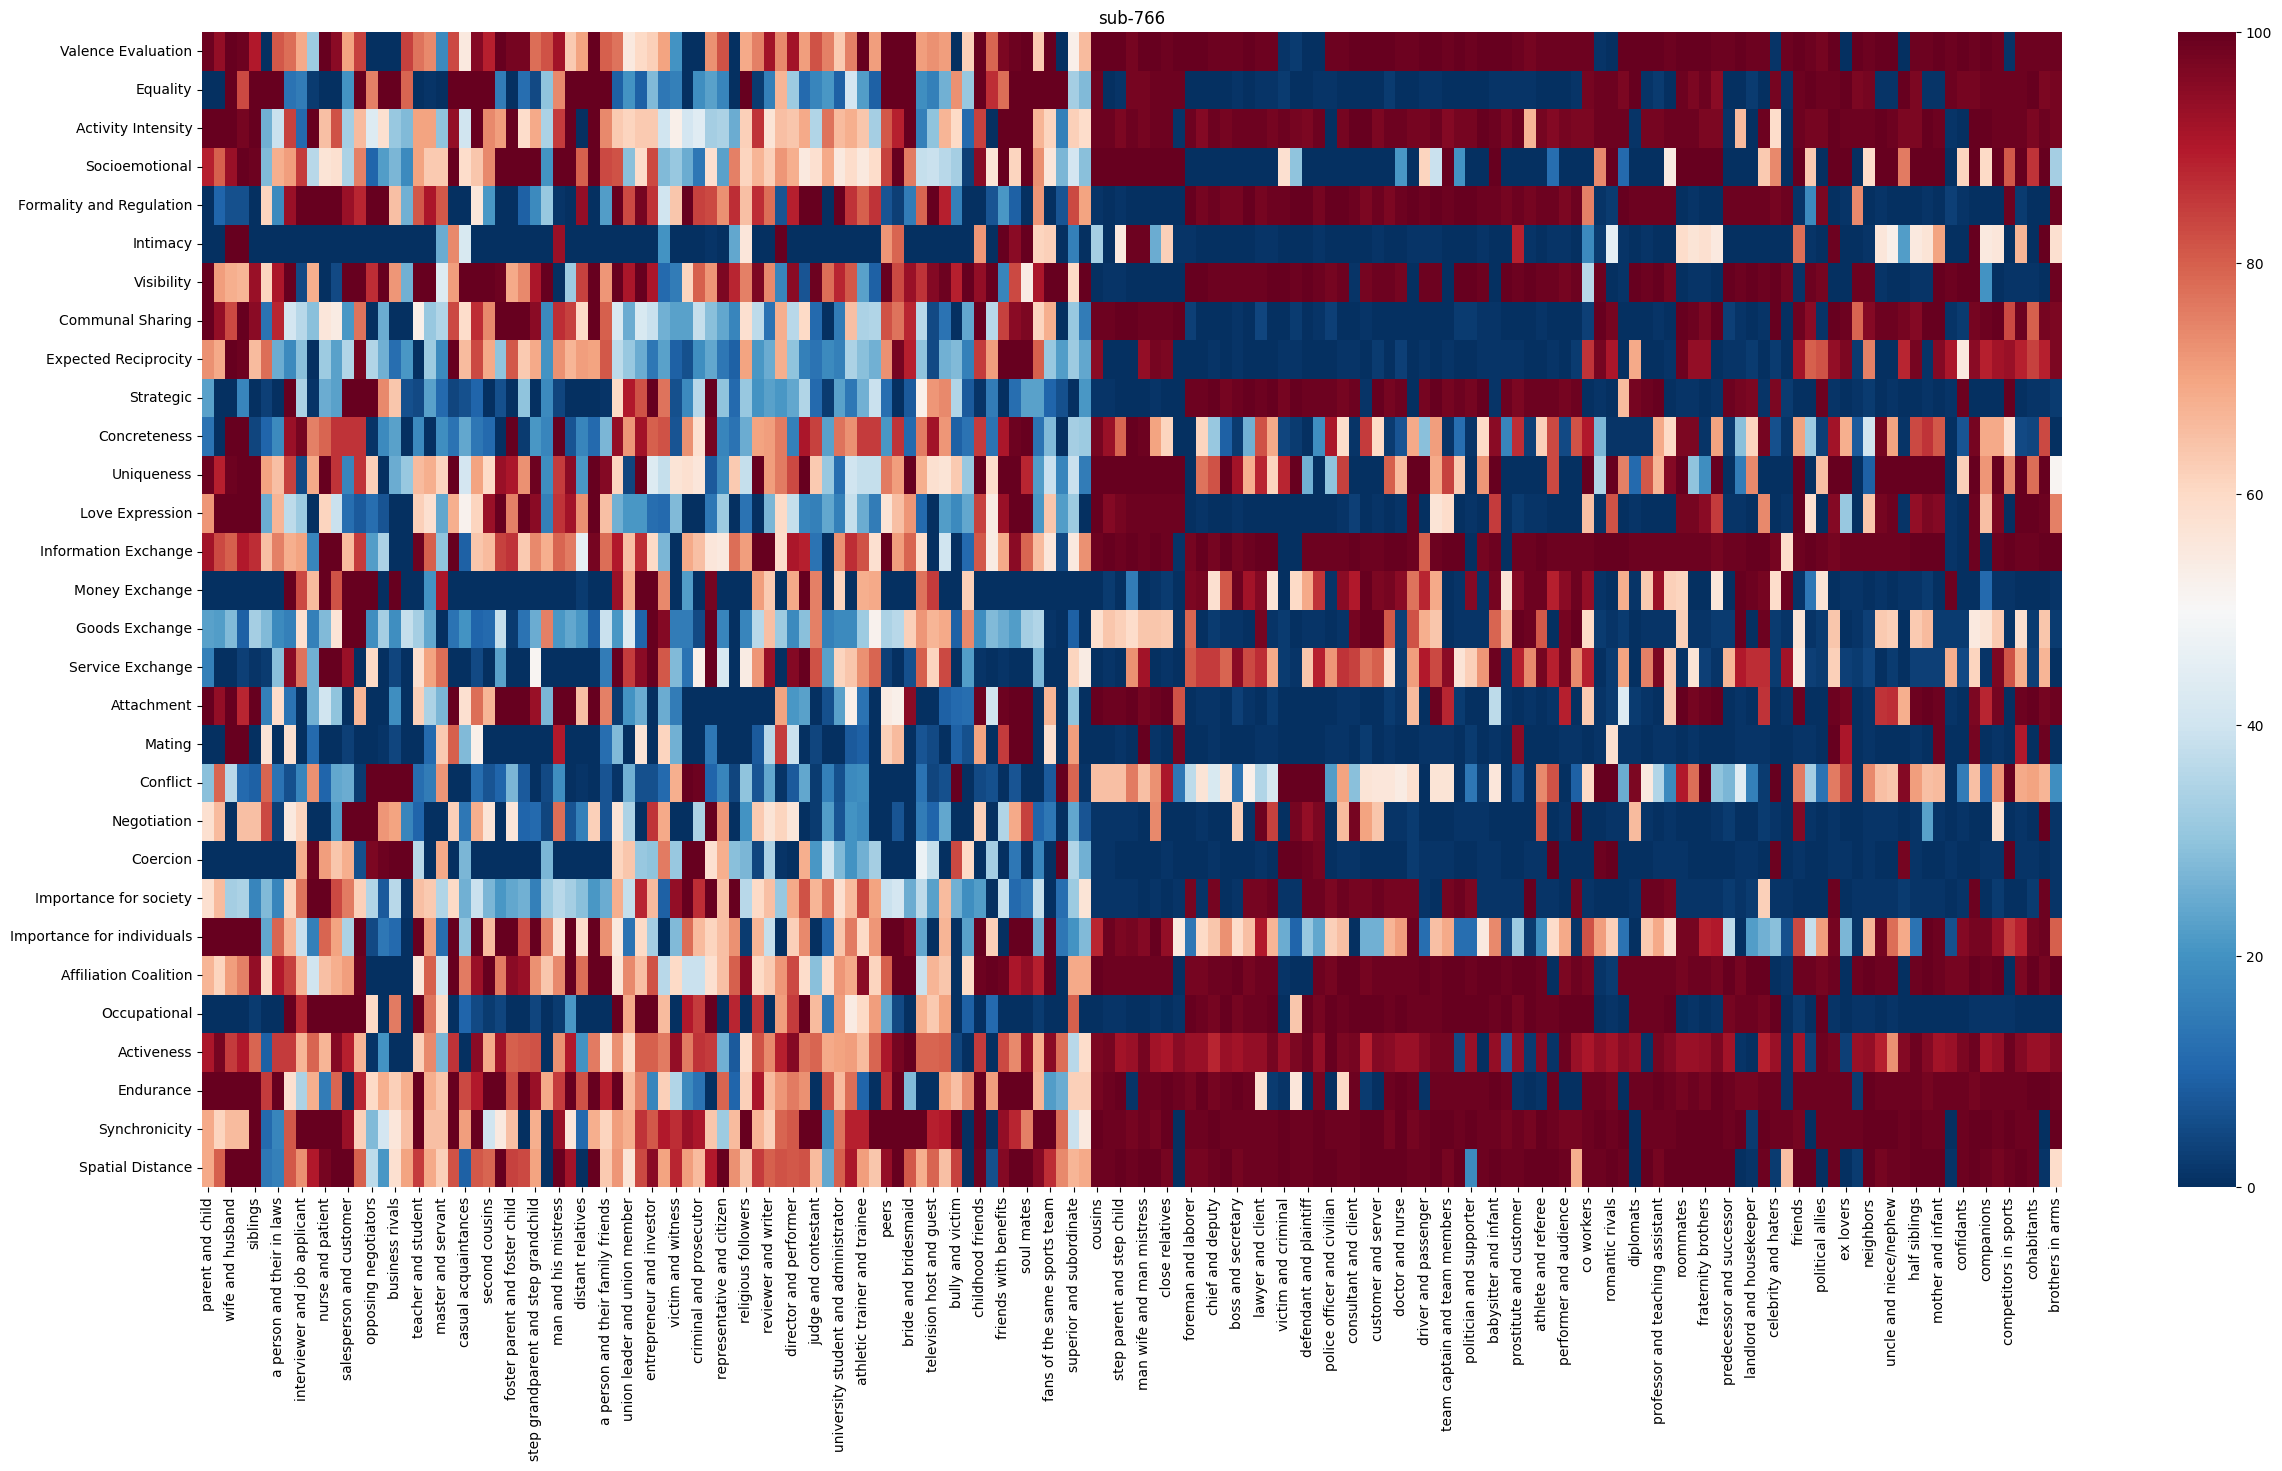

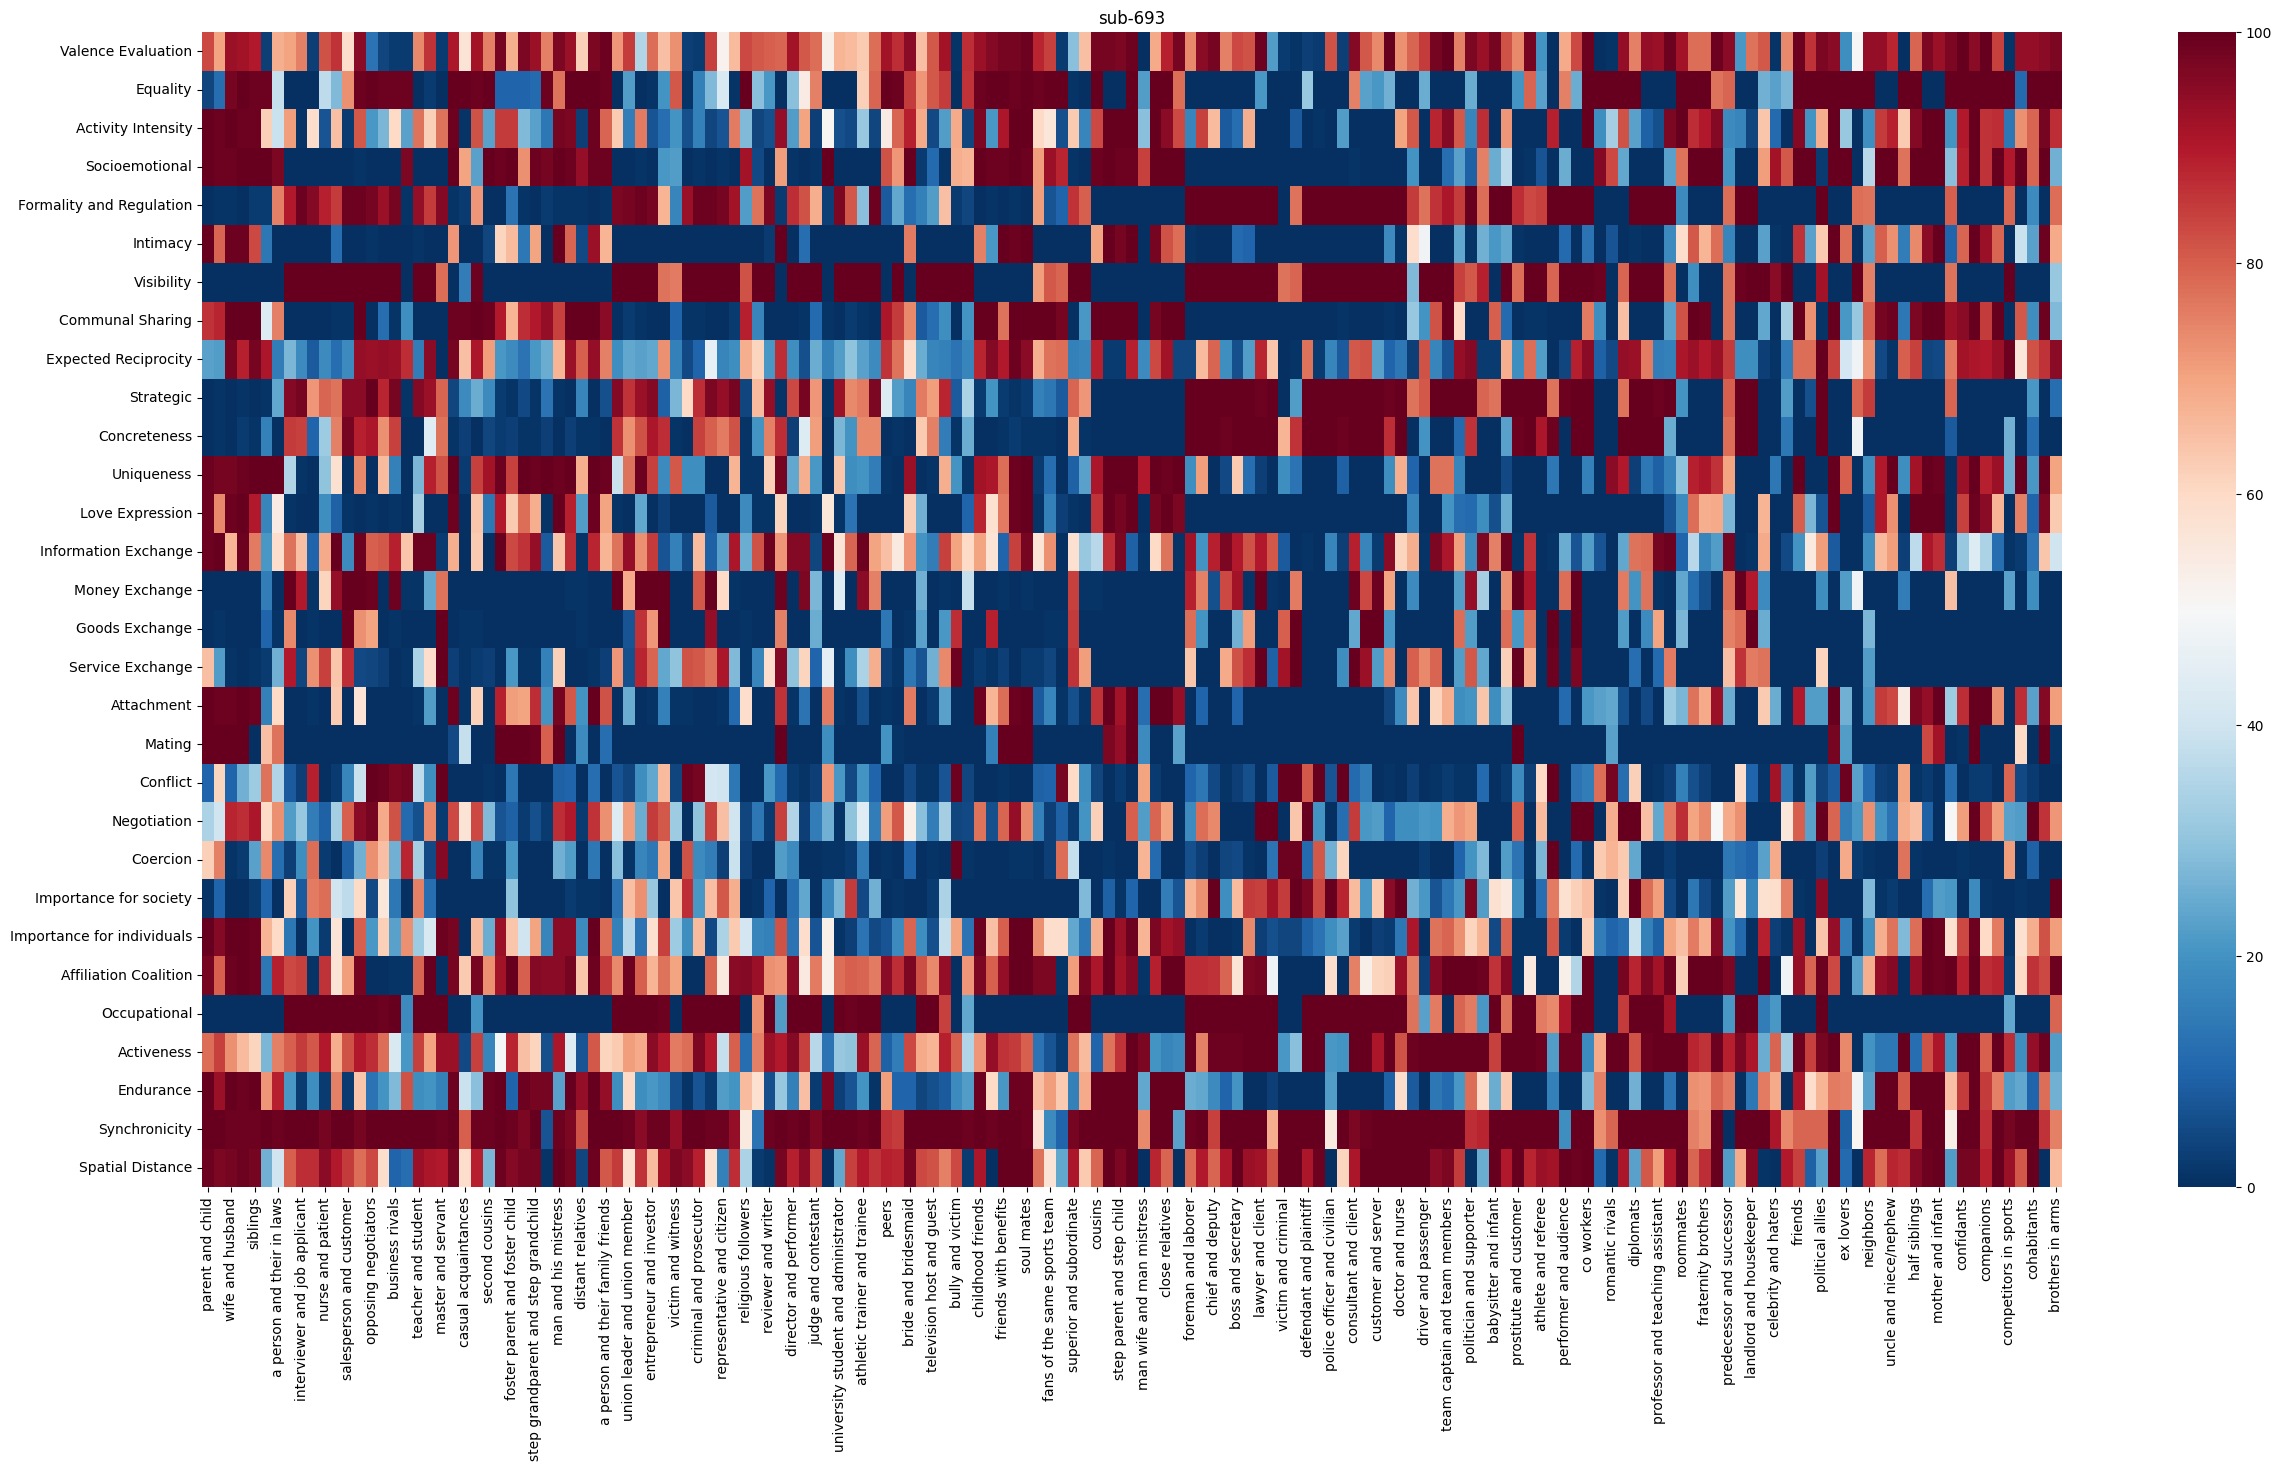

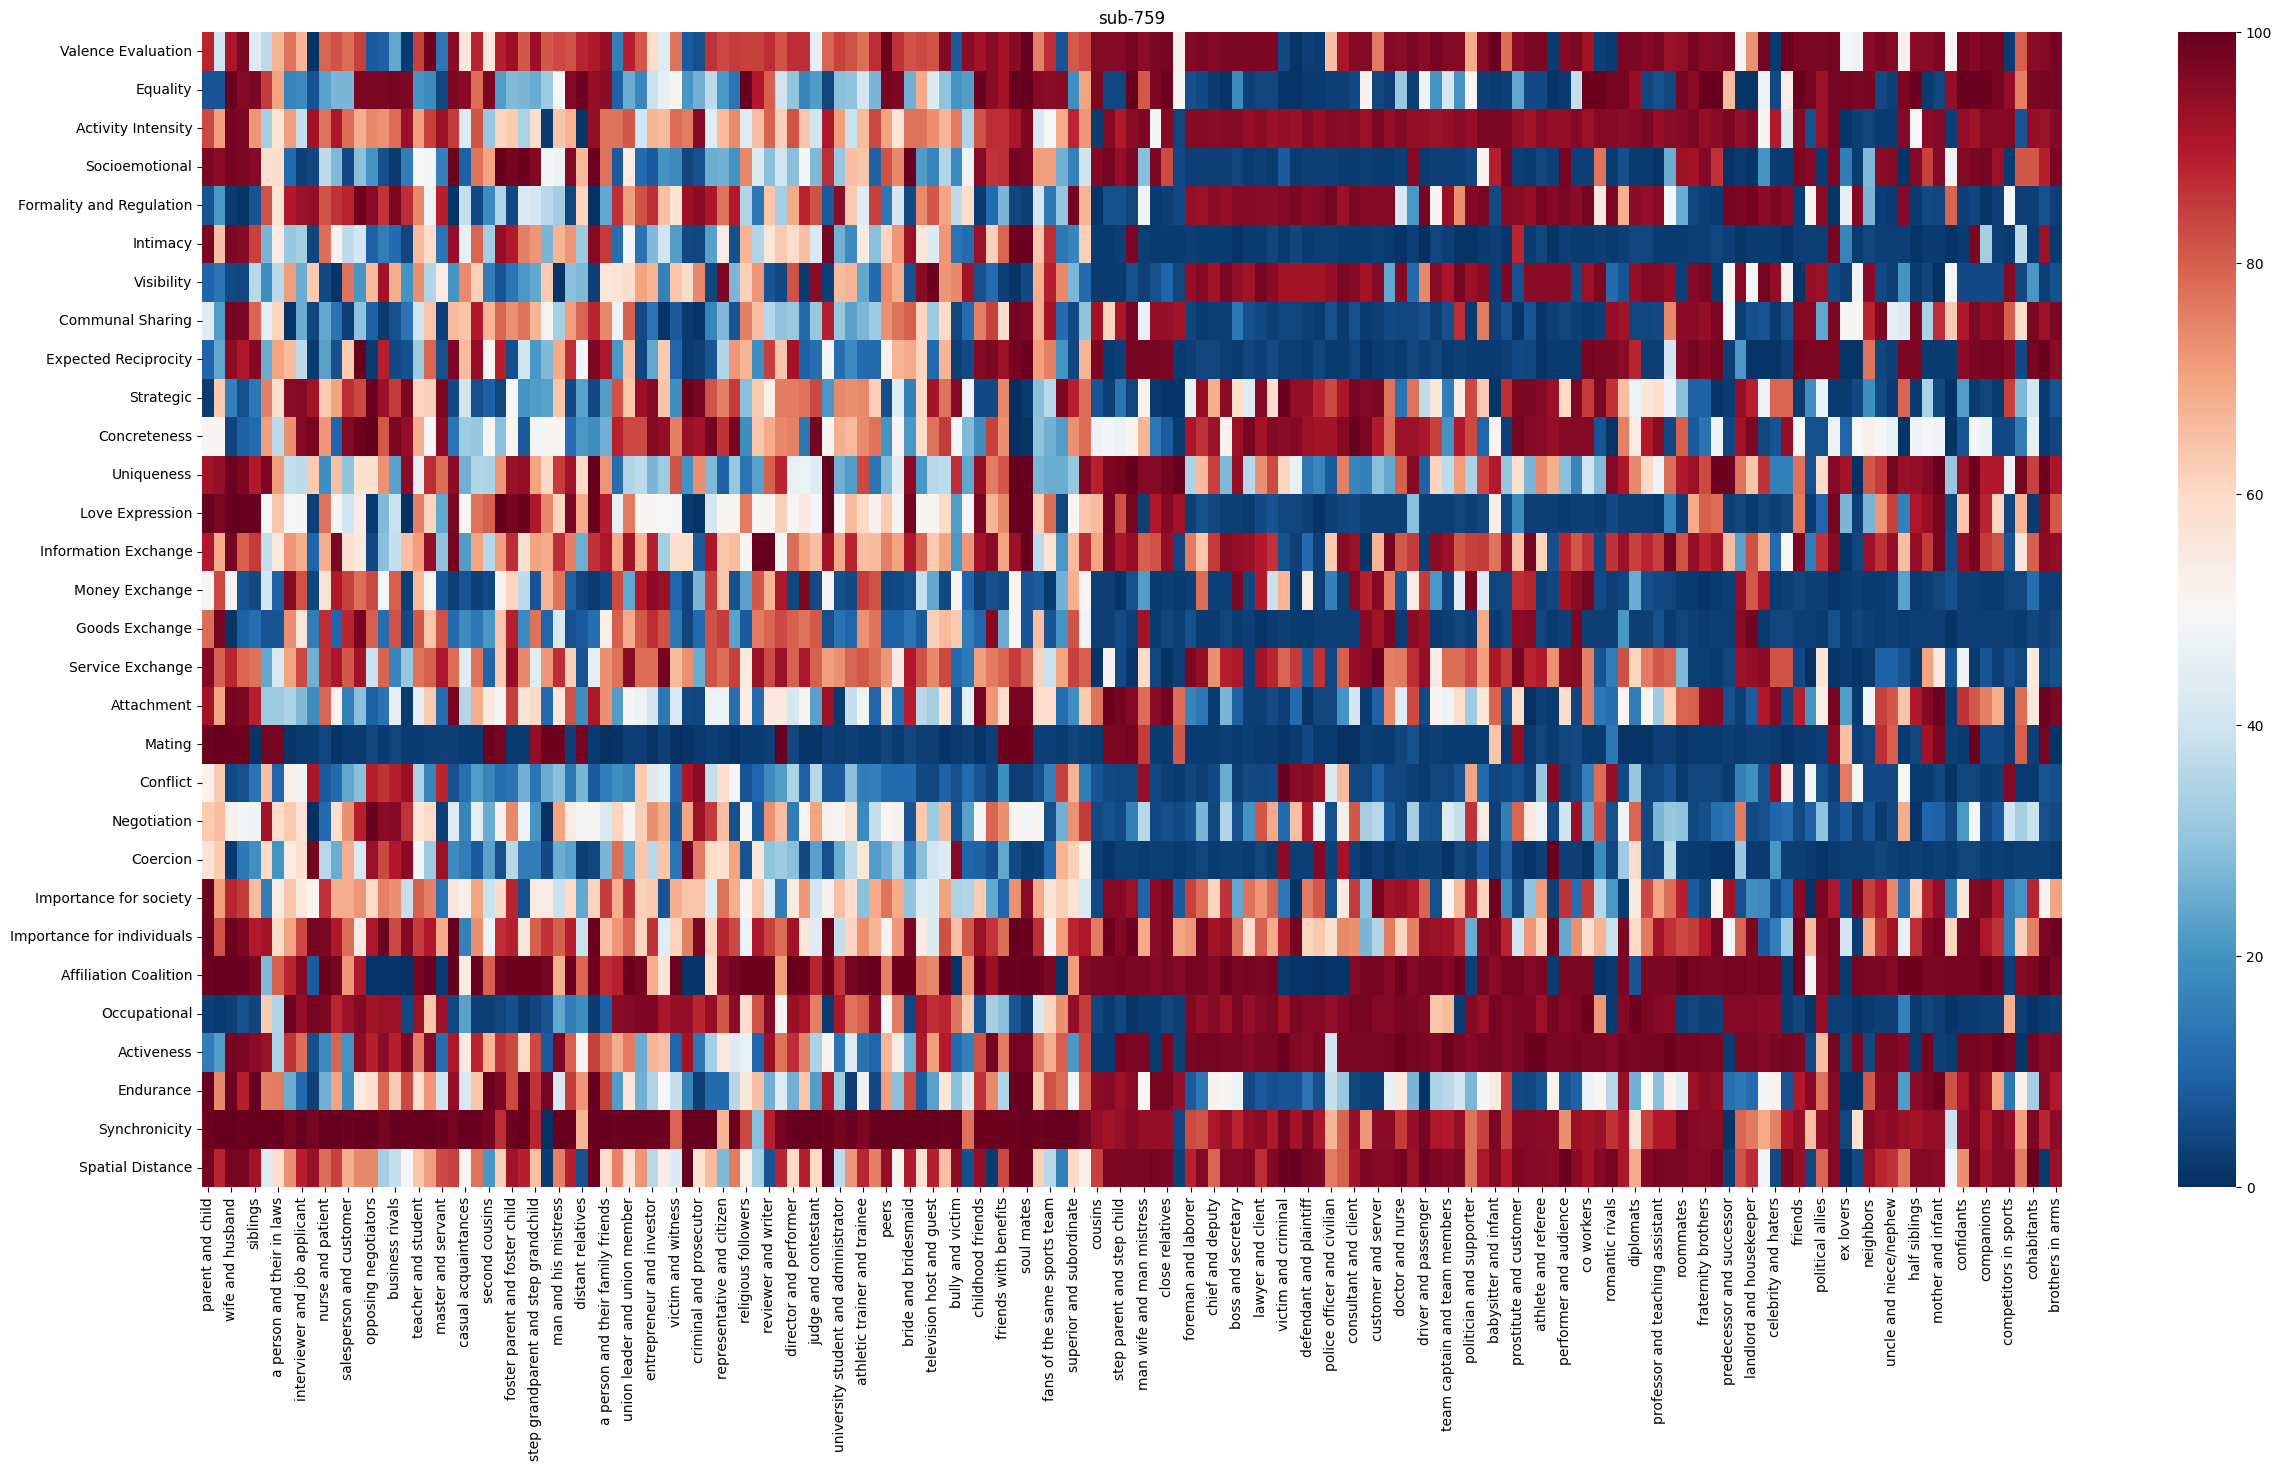

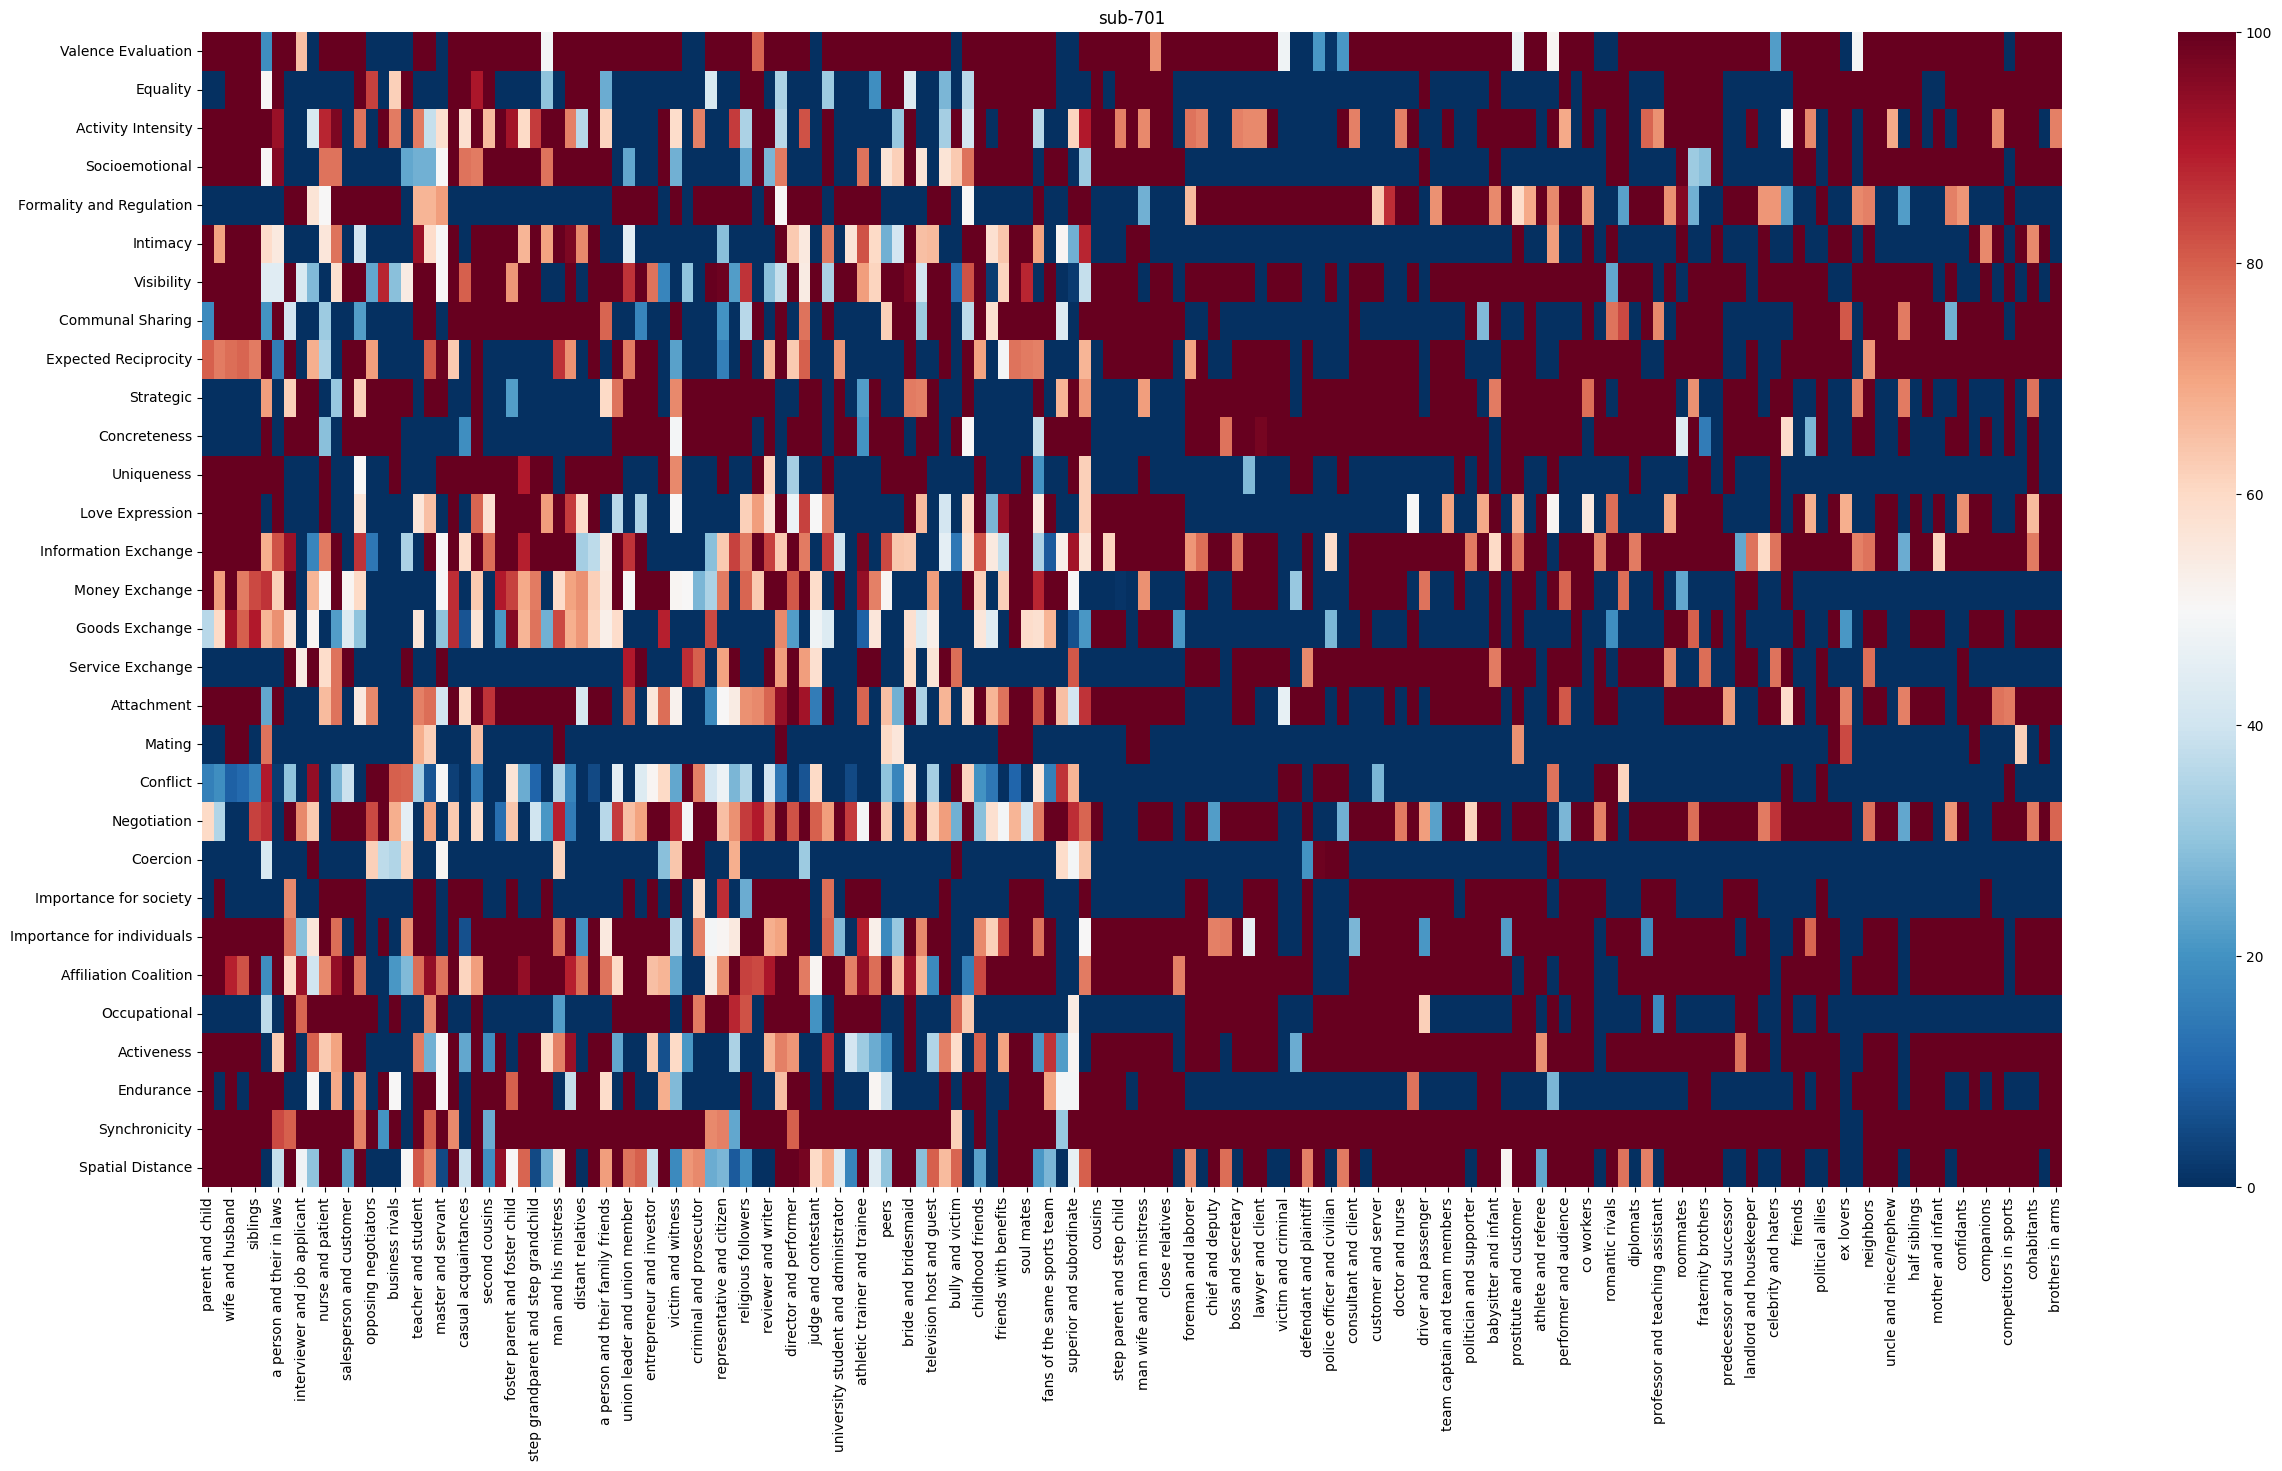

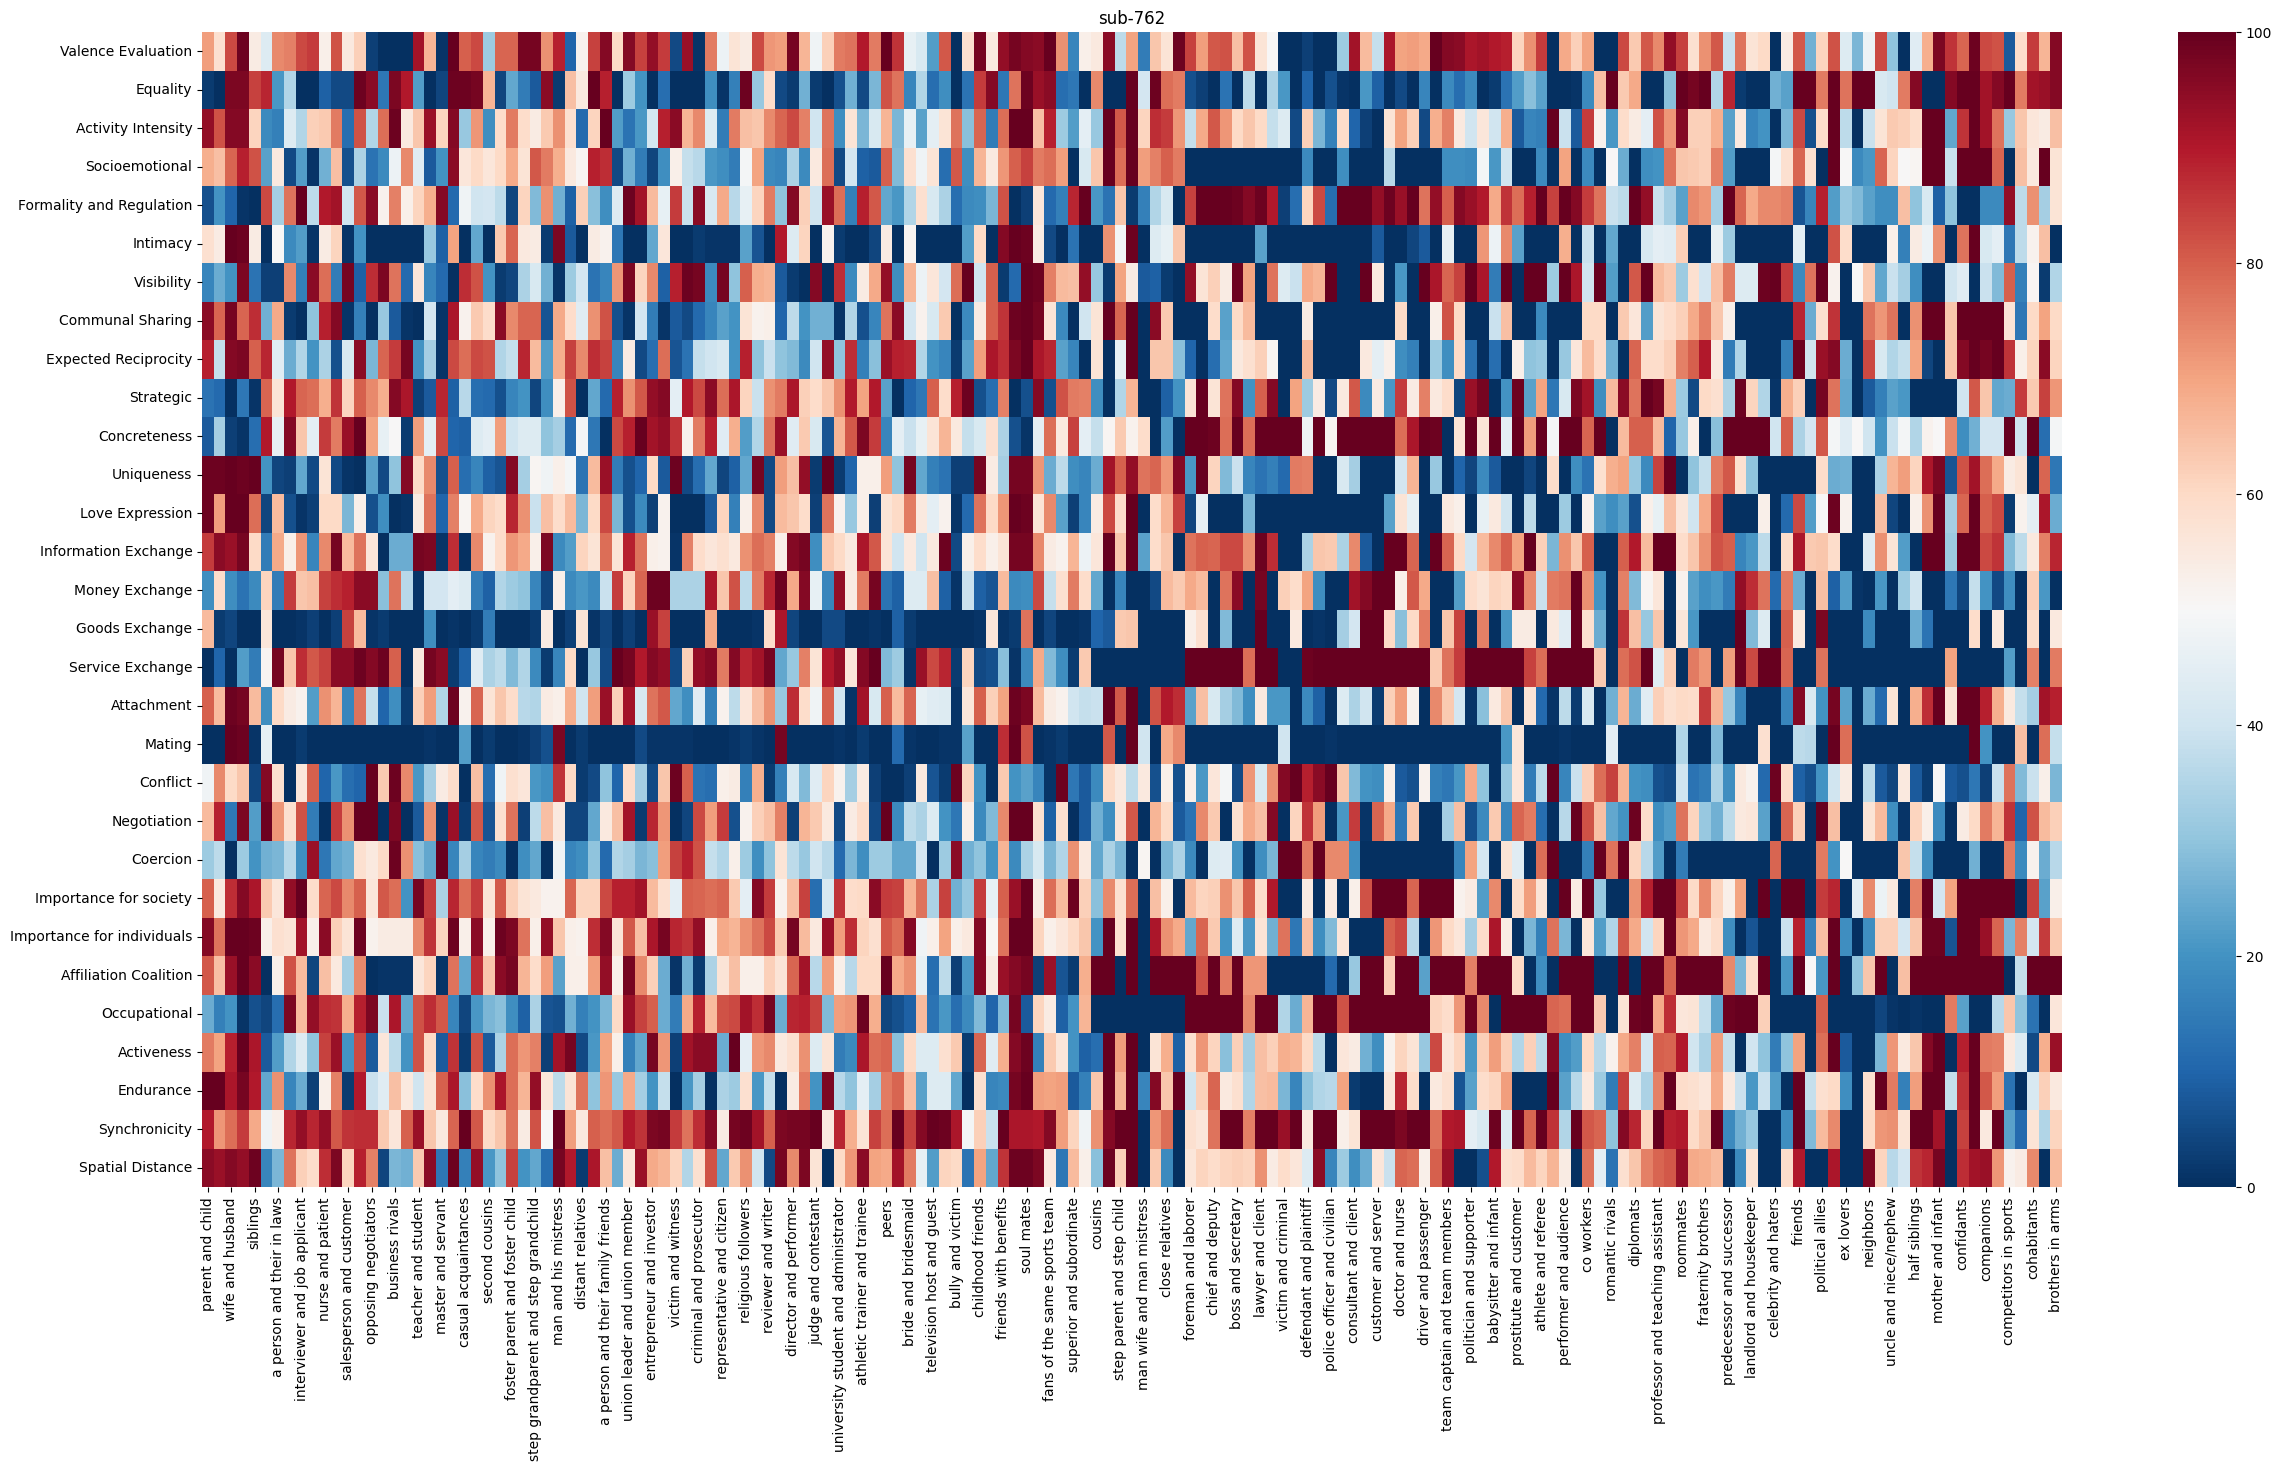

In [13]:
[clean_data(dimension_frames = dimension_frames_159r,relationships = relationships, sub_id = sub) for sub in sub_id_list]

# PCA

In [2]:
library(tidyverse)

library(ggplot2)
library(corrplot)
library(RColorBrewer)

## generate loading and relationship scores

In [14]:
dim_ind_list = dir('../../output_data/individual/dimension/clean_results/dim_rel_scaled/')
dim_ind_dir = c()
for (ind in dim_ind_list){
    dim_ind_dir = append(dim_ind_dir,paste('../../output_data/individual/dimension/clean_results/dim_rel_scaled/',ind, sep = ''))
}

num = 8 # depend on file path
ncomp = 5

for (ind_dir in dim_ind_dir){
    ind_csv = strsplit(ind_dir,'/')[[1]][num]
    ind_df = read.csv(ind_dir,row.names=1,encoding='UTF-8')
    
    prc = prcomp(ind_df)
    loadings_none = prc$rotation[,1:ncomp]%*%diag(prc$sdev,ncomp,ncomp)#output loadings
    scores_none = prc$x[,1:ncomp]#output scores
    
    #ind_csv = gsub('soc','sub',ind_csv)
    write.csv(loadings_none, file = paste('../../output_data/individual/dimension/pca_results/loadings_none/',ind_csv,sep=''))
    write.csv(scores_none, file = paste('../../output_data/individual/dimension/pca_results/scores_none/',ind_csv,sep=''))
    
    # rotation with varimax
    loadings_var = varimax(loadings_none)$loadings
    scores_var = scale(scores_none)%*%varimax(loadings_none)$rotmat
    write.csv(loadings_var, file = paste('../../output_data/individual/dimension/pca_results/loadings_var/',ind_csv,sep=''))
    write.csv(scores_var, file = paste('../../output_data/individual/dimension/pca_results/scores_var/',ind_csv,sep=''))    
}

## plot loadings

In [15]:
plot_loadings = function(file_sub_id){
    file_path = paste('../../output_data/individual/dimension/pca_results/loadings_var/',file_sub_id,sep='')
    loadings_var_reorder = read.csv(file_path,row.names=1)
    #filter each row's max loading, and attribute it to correspnding column.
    order_list = c()
    for (row in c(1:30)){
        temp_max = abs(loadings_var_reorder[row,1])
        n = 1
        for (col in c(2:5)){
            temp = abs(loadings_var_reorder[row,col])
            if (temp > temp_max){
                temp_max = temp
                n = col
            }

        }
        order_list[row] = n
    }
    loadings_var_reorder = loadings_var_reorder %>% mutate(order = order_list)
    loadings_var_reorder['rel'] = rownames(loadings_var_reorder)
    RC1 = loadings_var_reorder %>% filter(order==1) %>% arrange(V1)
    RC2 = loadings_var_reorder %>% filter(order==2) %>% arrange(V2)
    RC3 = loadings_var_reorder %>% filter(order==3) %>% arrange(V3)
    RC4 = loadings_var_reorder %>% filter(order==4) %>% arrange(V4)
    RC5 = loadings_var_reorder %>% filter(order==5) %>% arrange(V5)
    loadings_var_reorder = loadings_var_reorder$'rel'

    loadings_var_reorder = rbind(RC1,RC2,RC3,RC4,RC5)
    loadings_var_reorder = loadings_var_reorder[1:5]

    options(repr.plot.width=6, repr.plot.height=10)
    my.breaks = c(seq(-1,1,by=0.01))
    corrplot(as.matrix(loadings_var_reorder),is.corr=FALSE,title = file_sub_id,mar=c(0,0,1,0),
             tl.col = "black",tl.srt=60,tl.cex=1.1,family='sans',font=2,
             col.lim = c(-1,1),cl.ratio = 0.4,cl.cex=1,
             col = colorRampPalette(rev(brewer.pal(n=7,name ="RdBu")))(length(my.breaks)))  
}

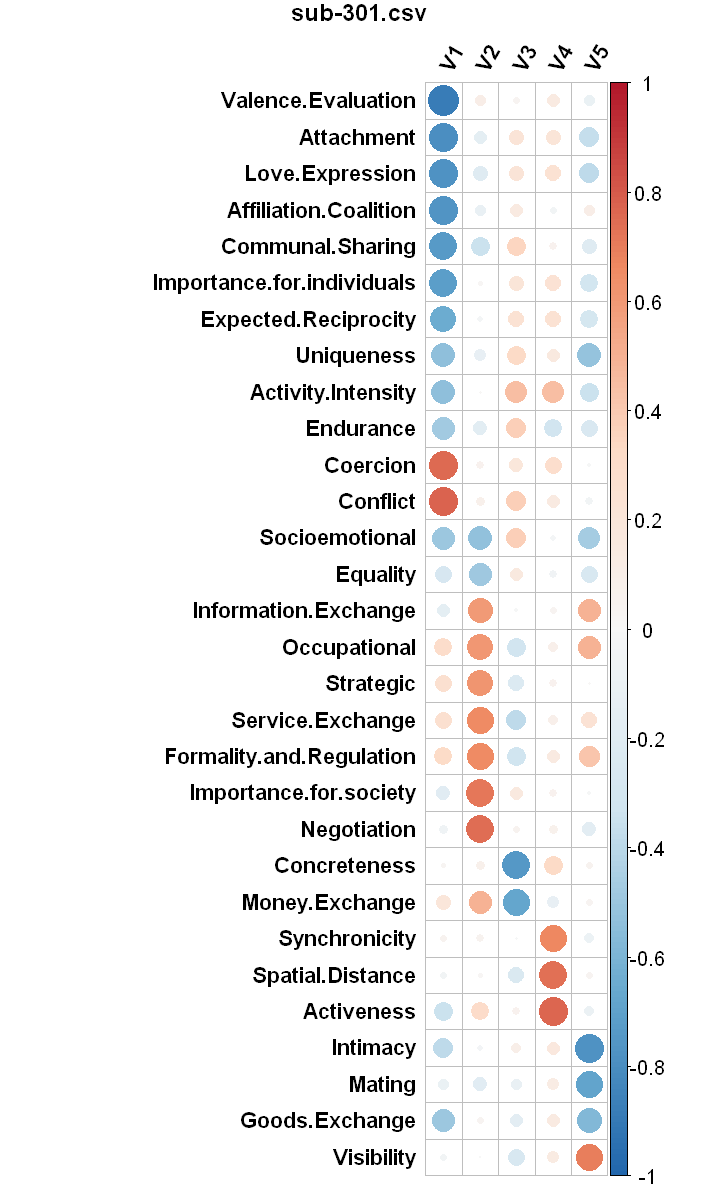

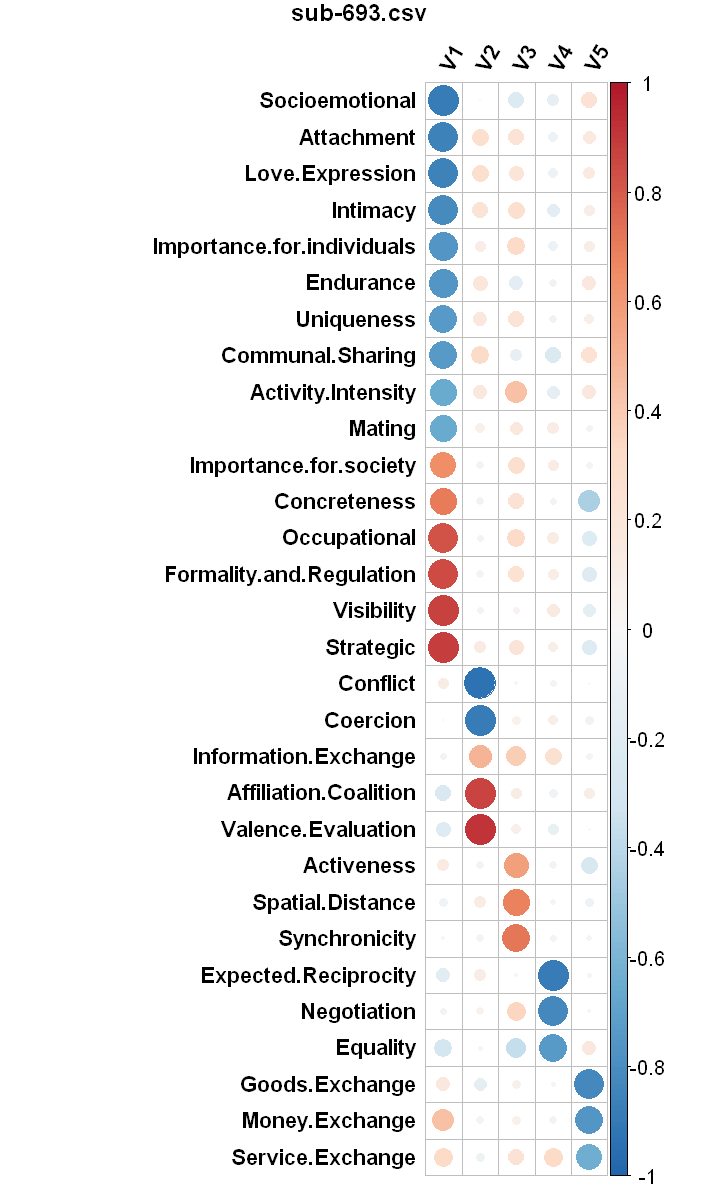

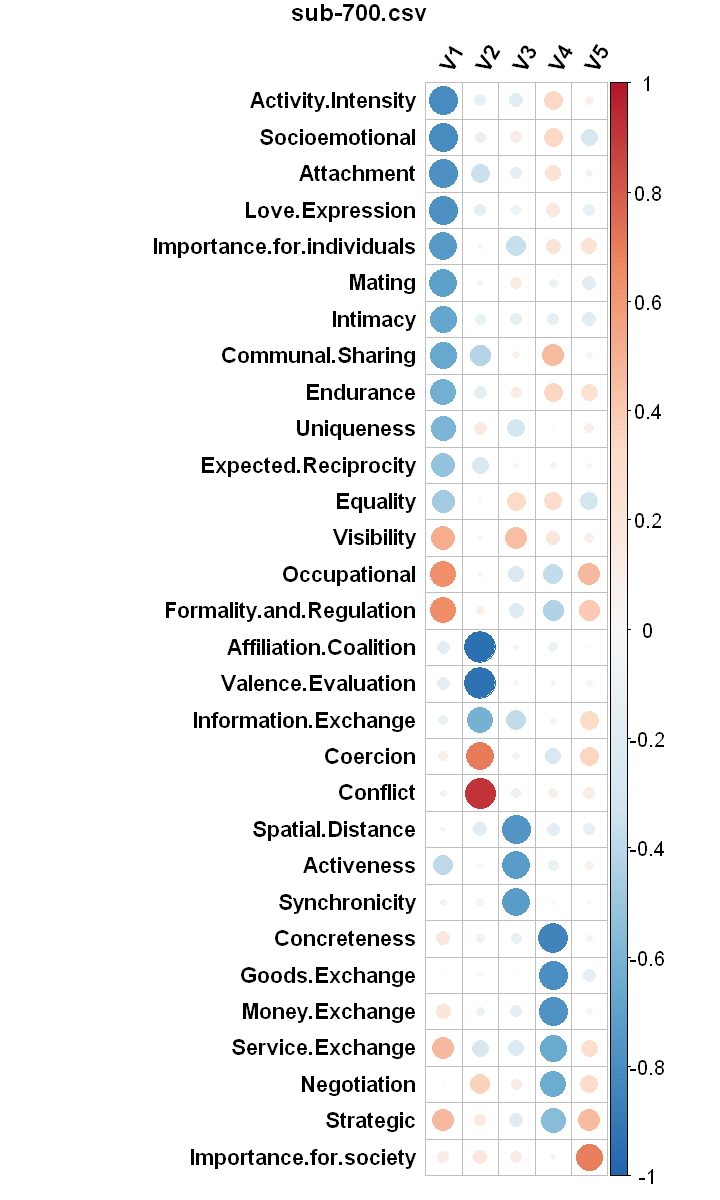

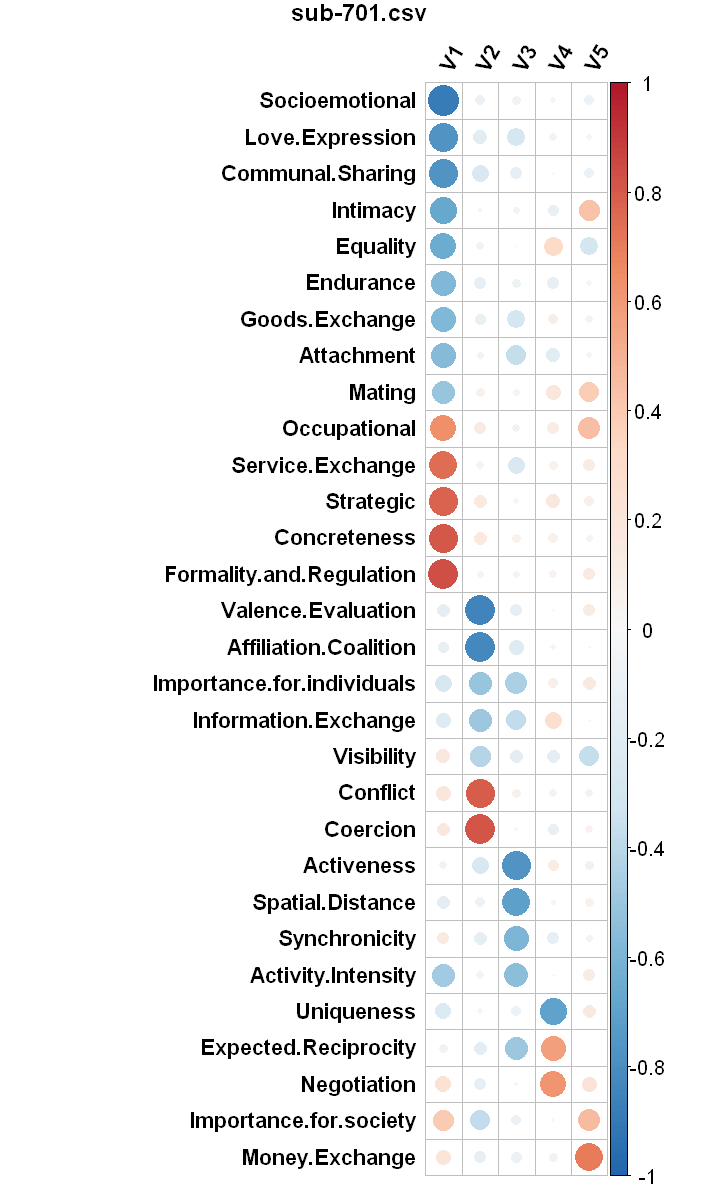

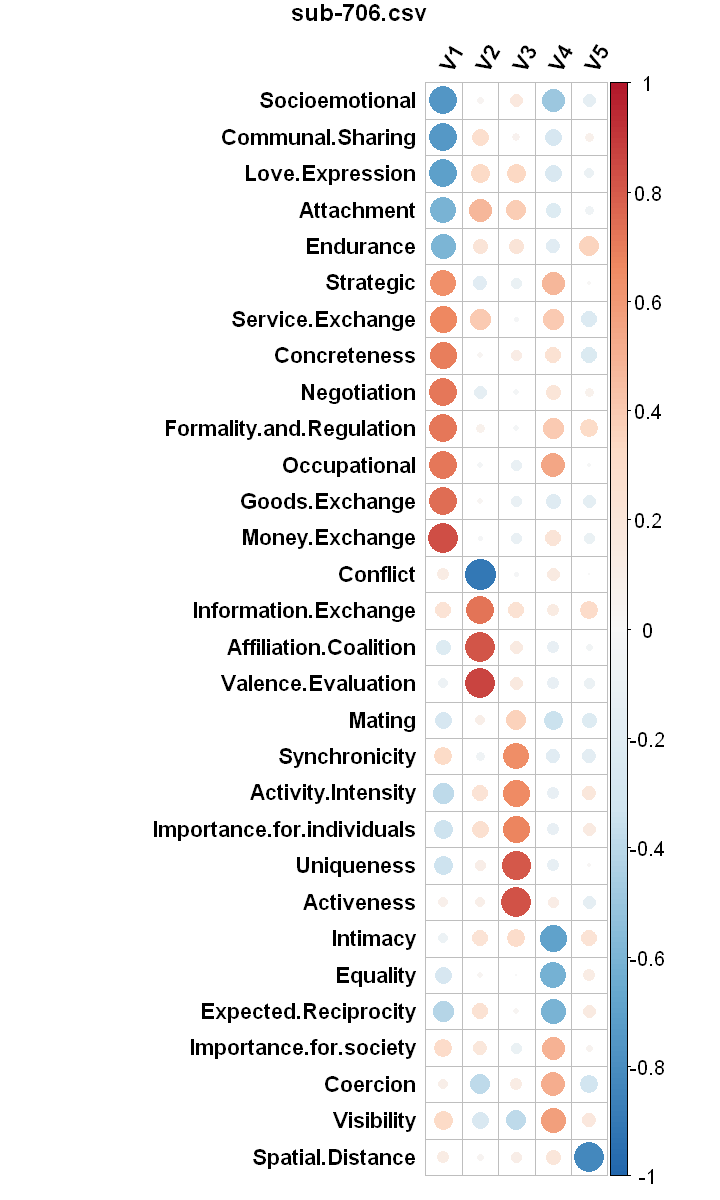

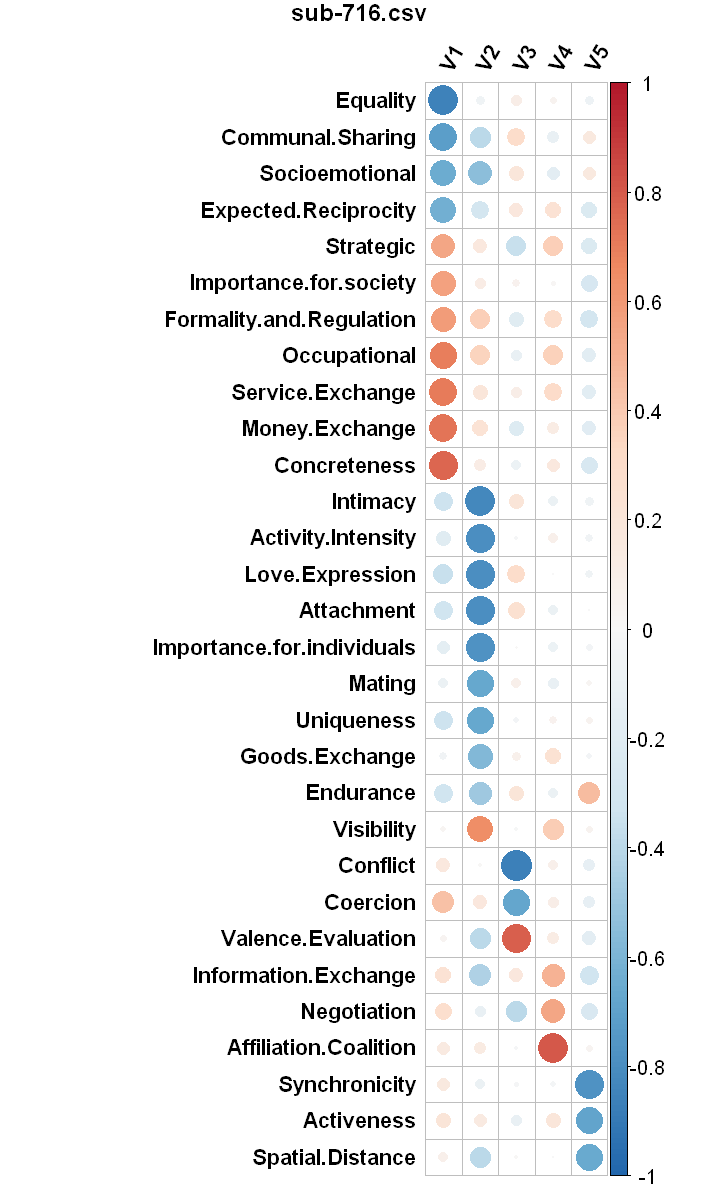

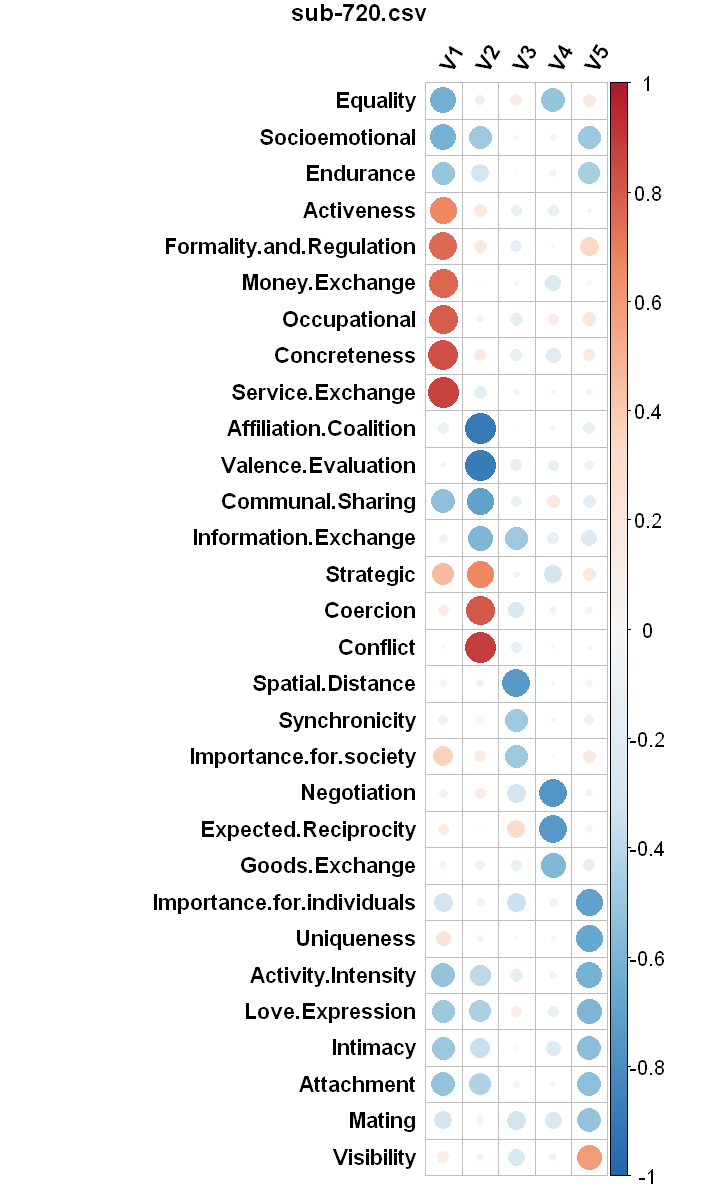

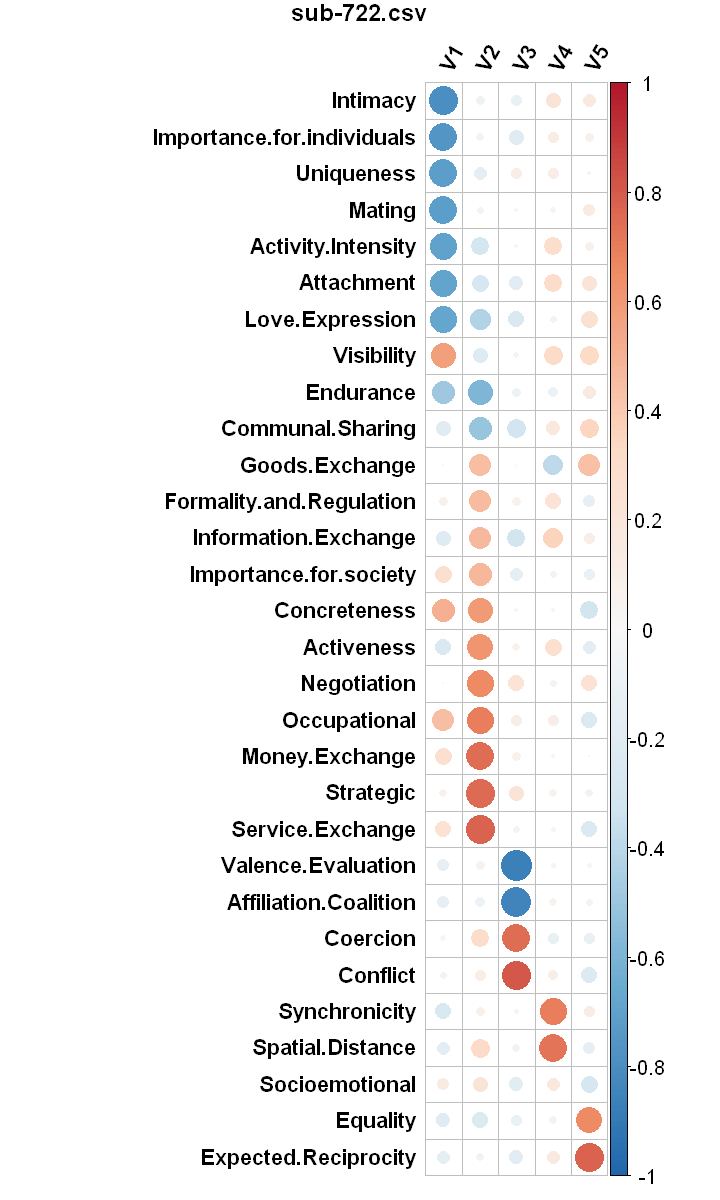

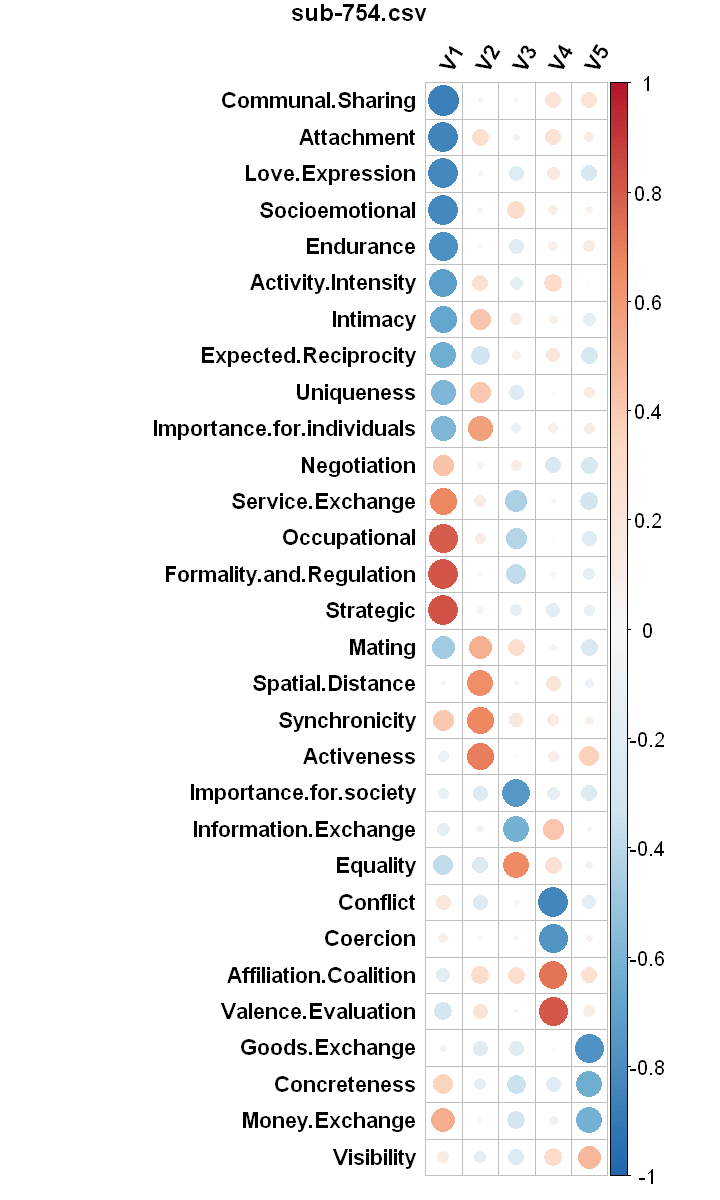

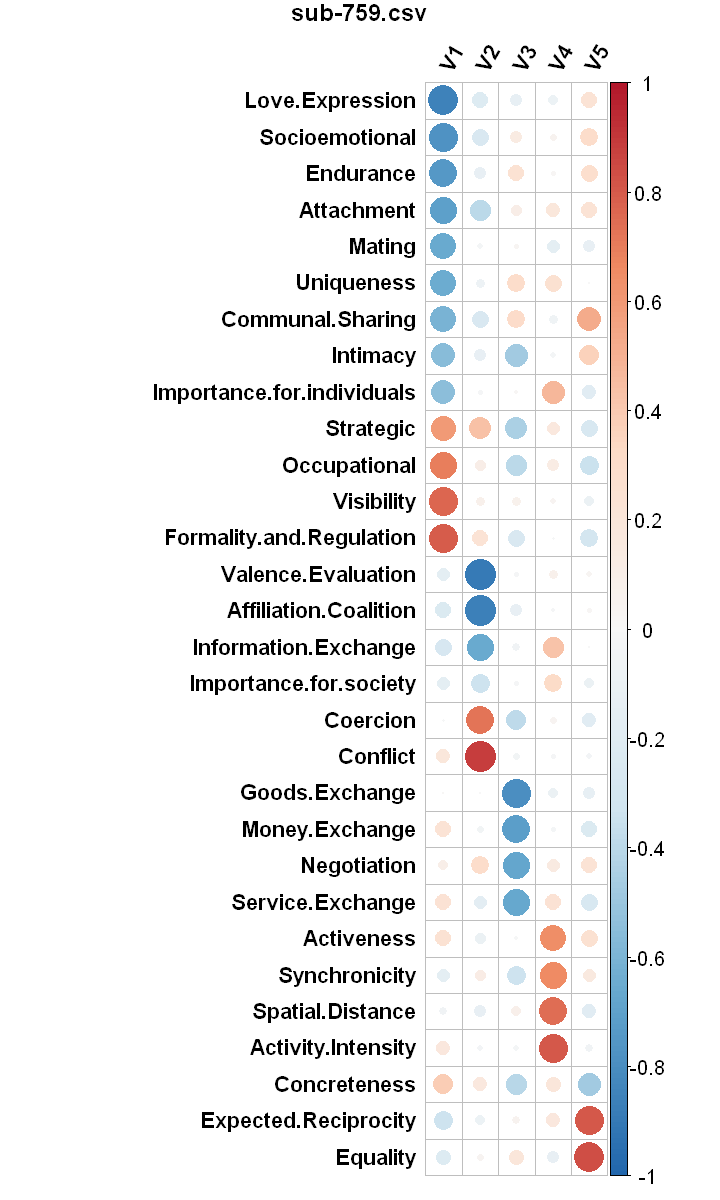

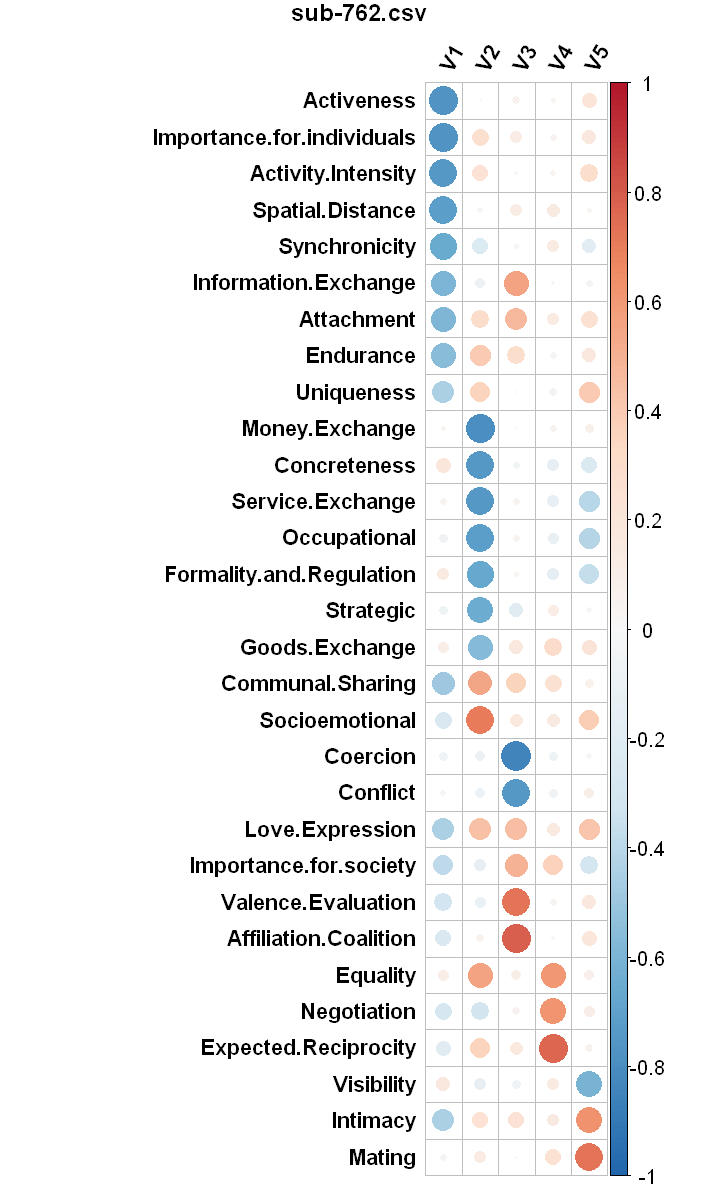

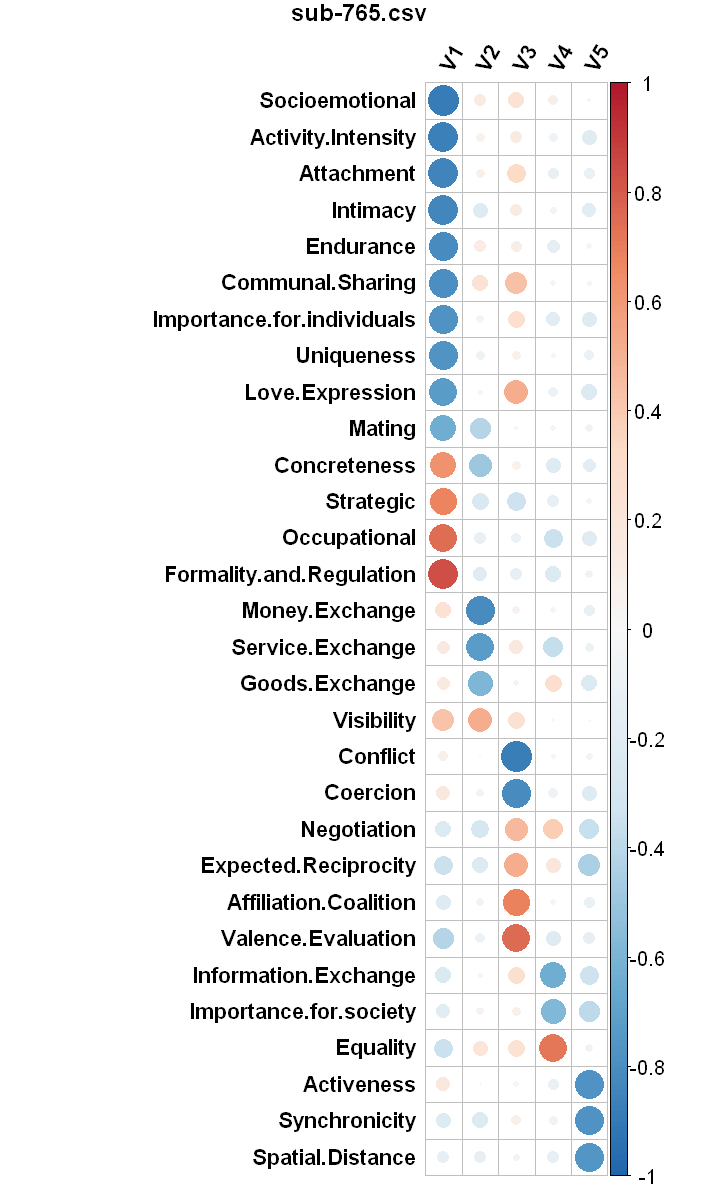

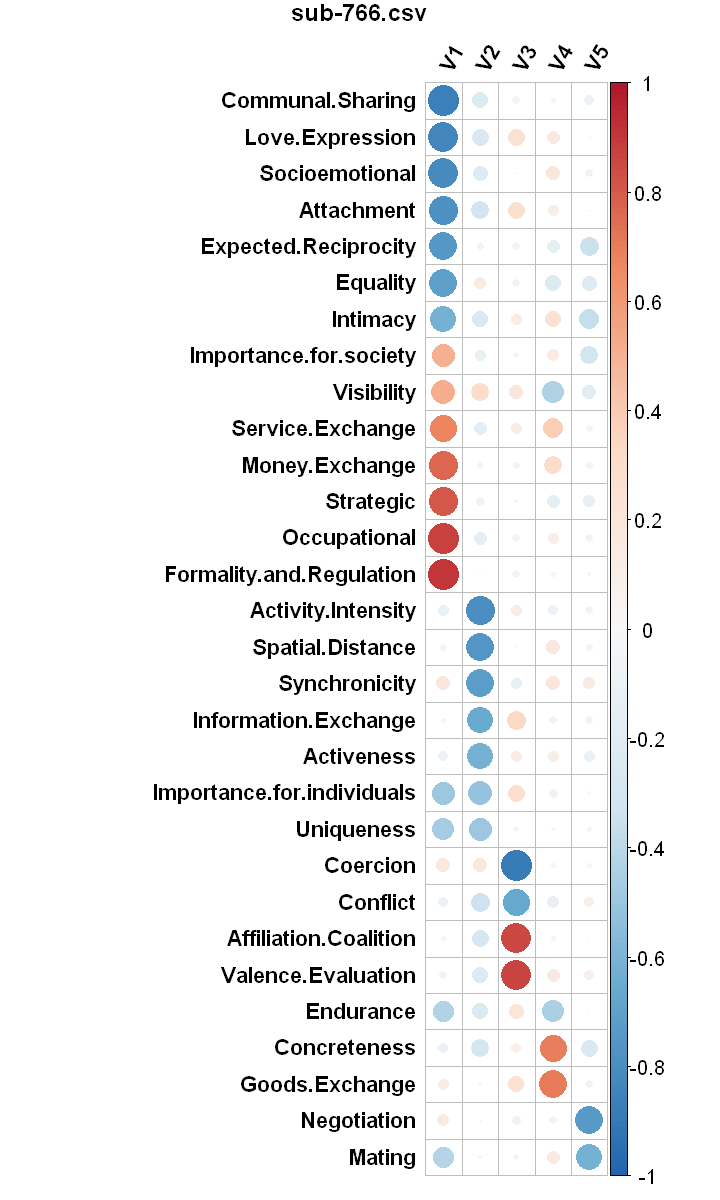

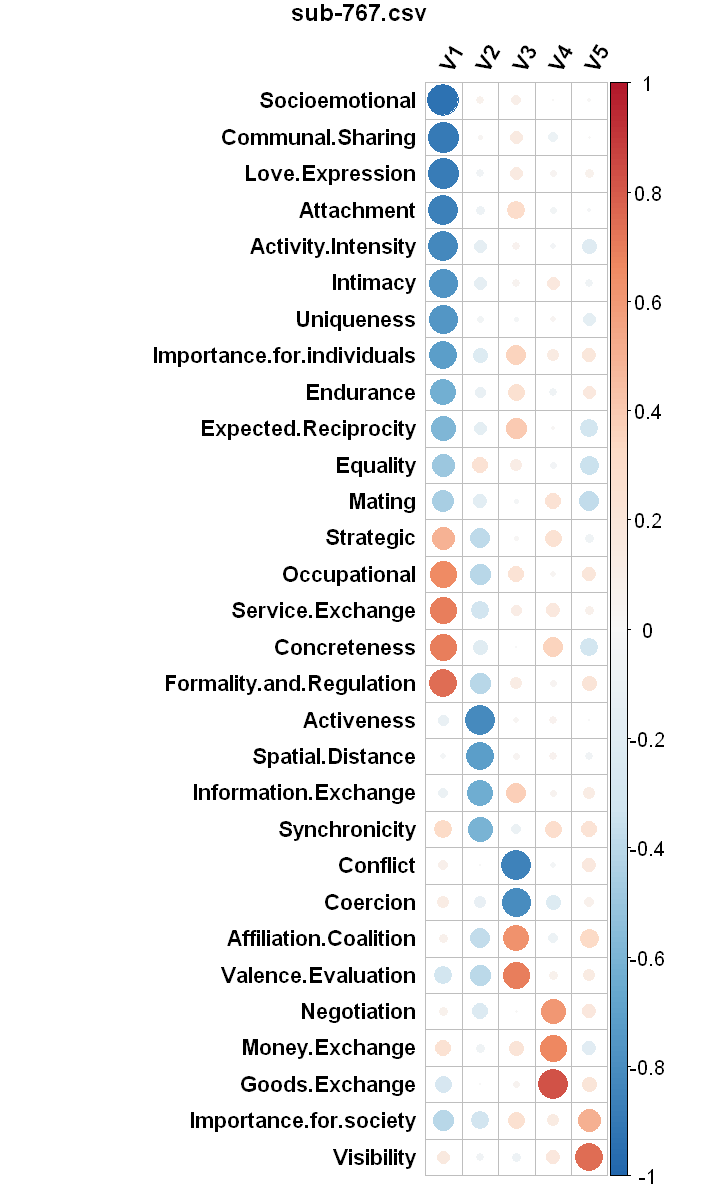

In [16]:
#dim_ind_list = gsub('soc','sub',dim_ind_list)
for (sub_id in dim_ind_list){
    plot_loadings(file_sub_id = sub_id)
}